In [4]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

- 공공데이터 포털에 있는 데이터를 Pandas의 melt, concat, transpose와 같은 reshape 기능을 활용해 분석
- groupby, pivot_table, info, describe, value_counts등을 통한 데이터 요약과 분석
- 이를 통해 전혀 다른 두 데이터의 정제와 병합, 수치형 데이터의 차이를 이해하고 다양한 그래프로 시각화(barplot, lineplot, scatterplot, lmplot, swarmplot, histplot)

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [5]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본으로 하려면
# import matplotlib.font_manager as fm
# font_name = fm.FontProperties(fname= 'C:/Windows/Fonts/GOTHIC.TTF').get_name()
# plt.rc('font', family=font_name)
# plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# # warning(경고) 안보이게
# import warnings
# warnings.filterwarnings(action='ignore') # 경고 메세지 무시

# 2. 데이터 다운로드
- https://www.data.go.kr 에서 "아파트 분양 가격"을 검색한 csv 다운로드

## (1) 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색

In [6]:
df_first = pd.read_csv('C:/ai_x/download/부동산_250213/지역_연도별_평당가격.csv', encoding='cp949')
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [7]:
df_first.shape

(17, 22)

In [8]:
pd.options.display.max_columns = 22
df_first.tail(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,7833,7724,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [9]:
# isnum(), isnull() : 결측치 여부
# notna(), notbull() : 결측치가 아닌지 여부
df_first.isna().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [10]:
# set_index('열이름') : 열을 index로 setting
# reset_index() : index를 열로 setting
df_first.set_index('지역', inplace=True)

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

<Axes: ylabel='지역'>

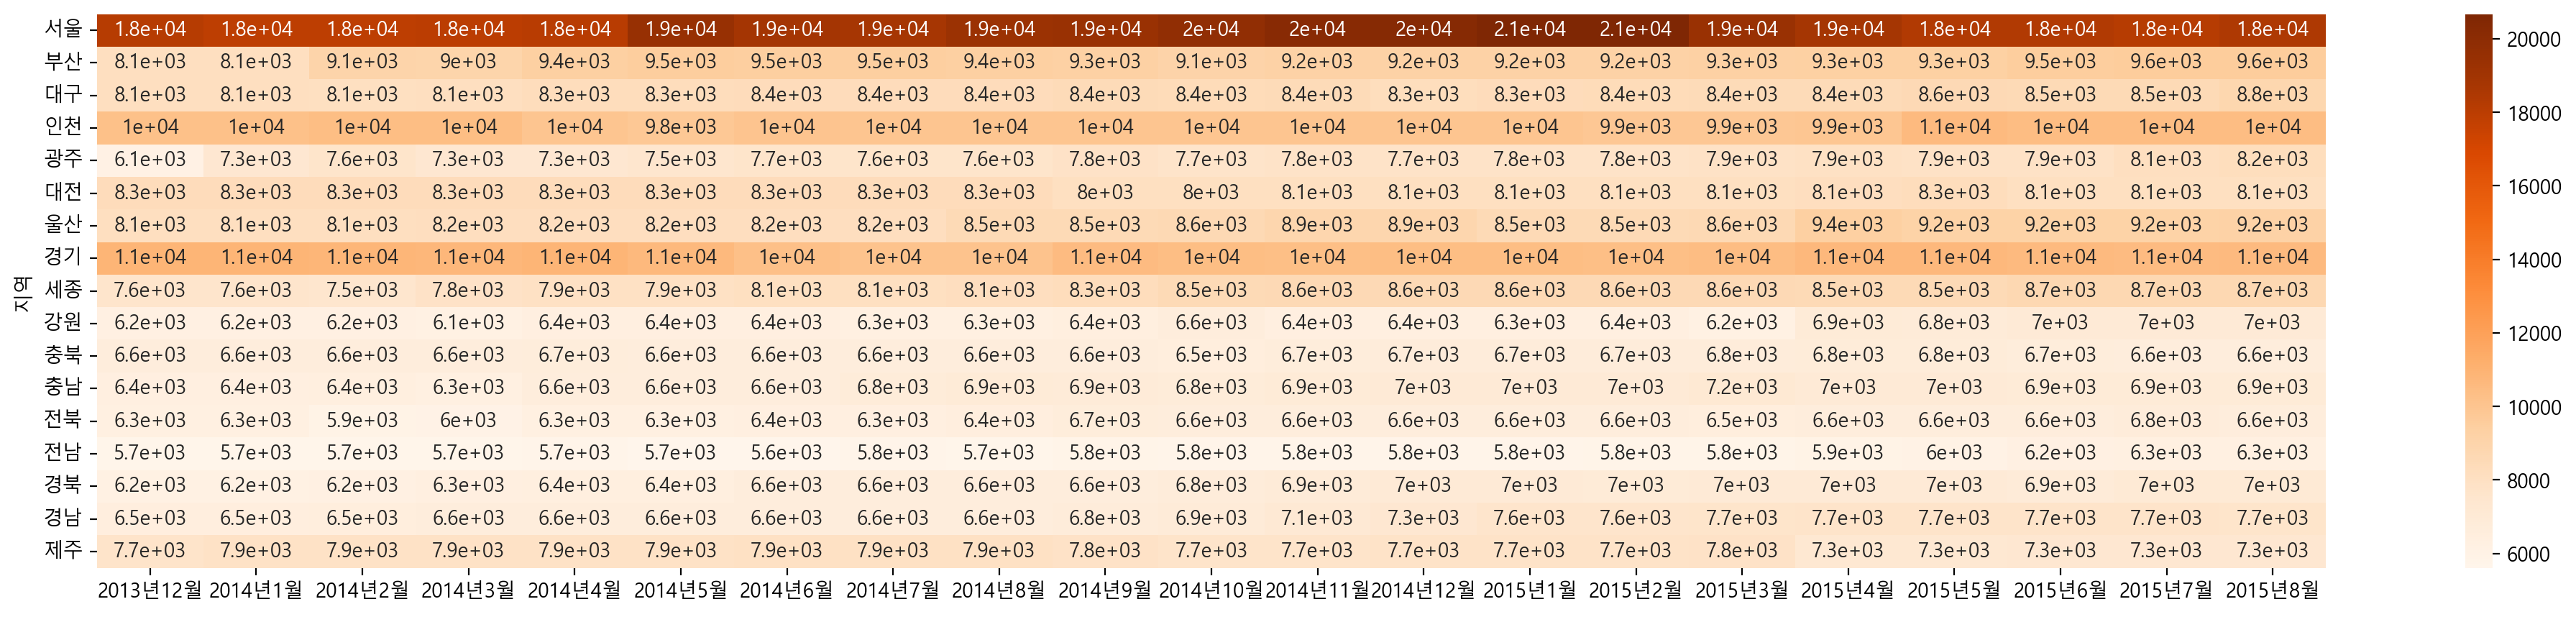

In [11]:
df_first.head()
plt.figure(figsize=(25, 5))
sns.heatmap(df_first, annot=True, cmap='Oranges')

## (2) 2015이후 데이터 분양가격에 간헐적으로 comma(,) 추가하여 csv로 출력
- 분양가격에 np.nan, ' ', '  ', 8111  ->  np.nan, ' ', '  ', 8111, "8,111"

In [12]:
ex = pd.read_csv('C:/ai_x/download/부동산_250213/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv', encoding='cp949')
ex.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [13]:
# isna(), isnull() - 결측치 여부
# notnull(), notna() - 결측치가 아닌지 여부
print('전체갯수 : ', ex.shape[0])
print('결측치 아닌 갯수 : ', ex['분양가격(제곱미터)'].notna().sum())
print('결측치 갯수 : ', ex['분양가격(제곱미터)'].isna().sum())

전체갯수 :  9095
결측치 아닌 갯수 :  8481
결측치 갯수 :  614


In [14]:
# 분양가격(제곱미터)가 결측치인 행 상위2개
ex[ex['분양가격(제곱미터)'].isna()].head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터)
368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
369,광주,전용면적 102제곱미터초과,2016,2,NaN


In [15]:
# 분양가격(제곱미터) 컬럼의 type을 float64로 타입 변환 : astype(), pd.to_numeric()
# ex['분양가격(제곱미터)'].astype('float64') # 에러 이유 : ' '
# pd.to_numeric(ex['분양가격(제곱미터)']) # 에러 이유 : ' '
pd.to_numeric(ex['분양가격(제곱미터)'], errors='coerce')  # 에러나는 행은 NaN으로

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
9090    7703.0
9091       NaN
9092    7515.0
9093       NaN
9094    7950.0
Name: 분양가격(제곱미터), Length: 9095, dtype: float64

In [16]:
# 분양가격(제곱미터) 컬럼이 space인 행 740 - 614 = 126
ex[ex['분양가격(제곱미터)'].str.strip() ==''].head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
28,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,


In [17]:
nanex = ex.loc[368] # 분양 가격이 결측치인 데이터
spaceex = ex.loc[28] # 분양 가격이 space
ex.loc[0] # 분양 가격이 정상인 데이터

지역명             서울
규모구분          모든면적
연도            2015
월               10
분양가격(제곱미터)    5841
Name: 0, dtype: object

In [18]:
# 분양가격이 nan이거나 space면 0, 그외 분양가격의 문자자리수를 return하는 함수
def get_pricelen(row):
    price = row['분양가격(제곱미터)']
    # np.isnan(스칼라변수) : 스칼라변수가 결측치(np.nan)인지 여부
    # pd.isna(스칼라변수) : 스칼라변수가 결측치(np.nan, None)인지 여부
    # pd.notnull(스칼라변수) : 결측치가 아닌지 여부
    # 1차원이나2차원변수.isna() : 결측치 여부
    if pd.notnull(price) and price.strip() != '' :
        return len(price)
    else:
        return 0

get_pricelen(nanex), get_pricelen(spaceex), get_pricelen(ex.loc[0])


(0, 0, 4)

In [19]:
ex['자리수'] = ex.apply(get_pricelen, axis=1)
ex.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,서울,모든면적,2015,10,5841,4
1,서울,전용면적 60제곱미터이하,2015,10,5652,4
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,4
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,4
4,서울,전용면적 102제곱미터초과,2015,10,5879,4


In [20]:
ex.index.name = 'idx'
ex.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
idx,,,,,,
0,서울,모든면적,2015,10,5841,4
1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [21]:
ex = ex.reset_index()
ex.head(2)

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,0,서울,모든면적,2015,10,5841,4
1,1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [22]:
# 2022년 데이터 흉내내기 위한 함수  : nan, ' ', '  ', '5123', '5,123'
def comma_append(row):
    price = row['분양가격(제곱미터)']
    if (row.idx%5 ==0) & (row.자리수 >= 4):
        price = price[:-3] + ',' + price[-3:]
    return price 

In [23]:
ex['분양가격(제곱미터)'] = ex.apply(comma_append, axis=1)

In [24]:
ex.drop(['idx','자리수'], axis=1, inplace=True)

In [25]:
# 간헐적으로 평당분양가에 ,가 있거나 np.nan이 있거나 space가 있는 데이터 csv로 백업
ex.to_csv('data/ch13/ex.csv', index=False)

## (3) 이후 데이터는 df_last 변수에 담아 탐색

In [26]:
df_last = pd.read_csv('data/ch13/ex.csv')

In [27]:
# 데이터 요약하기
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9095 non-null   object
 1   규모구분        9095 non-null   object
 2   연도          9095 non-null   int64 
 3   월           9095 non-null   int64 
 4   분양가격(제곱미터)  8481 non-null   object
dtypes: int64(2), object(3)
memory usage: 355.4+ KB


# 3. df_last의 데이터 결측치를 확인하고 대체 고민

In [28]:
# 열별 결측치 갯수
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    614
dtype: int64

In [29]:
# 열별 결측치를 제외한 갯수
df_last.notna().sum()

지역명           9095
규모구분          9095
연도            9095
월             9095
분양가격(제곱미터)    8481
dtype: int64

# 4. df_last 데이셋에 평당분양가격컬럼 추가

## (1) astype('float')나 pd.to_numeric() 사용
## (2) 6,222 => 6222 수정, space가 저장된 경우 nan으로 수정하는 함수를 apply나 map적용
## (3) df_last['분양가격(제곱미터)']*3.3

In [30]:
pd.to_numeric(df_last['분양가격(제곱미터)'], errors='coerce')

0          NaN
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
9090       NaN
9091       NaN
9092    7515.0
9093       NaN
9094    7950.0
Name: 분양가격(제곱미터), Length: 9095, dtype: float64

### apply

In [31]:
# 콤마가 있는 문자에서 콤마 없애기 방법1
temp = '12,523'


In [32]:
# 콤마가 있는 문자에서 콤마 없애기 방법2
temp = '12,523'
tempsplited = temp.split(',')
temp = tempsplited[0] + tempsplited[1]
temp

'12523'

In [33]:
 # 분양가격 컬럼에 콤마(,)가 있는 경우 콤마(,)를 제거('5,123' -> '5123')
# 공백문자가 있는 경우 np.nan로 바꾸는 함수
def commadrop(row):
    pd.options.mode.copy_on_write = True
    price = row['분양가격(제곱미터)']
    if pd.isna(price) :  # np.nan 이거나 None인지 여부
        row['제곱미터분양가격'] = np.nan
    elif price.strip() == '' :  # space면 np.nan으로
        row['제곱미터분양가격'] = np.nan
    elif price.find(',') != -1 : # 콤마 있으면 없애기
        row['제곱미터분양가격'] = price.replace(',','')
    else :
        row['제곱미터분양가격'] = price
    return row

commadrop(df_last.loc[0]) # 콤마 제외
commadrop(df_last.loc[1]) # 그대로
commadrop(df_last.loc[28]) # 공백문자의 경우 nan
commadrop(df_last.loc[368]) # nan의 경우 nan

지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2016
월                                   2
분양가격(제곱미터)                        NaN
제곱미터분양가격                          NaN
Name: 368, dtype: object

In [34]:
# 공백문자는 결측치로, 콤마는 제거하기를 모든 행에 적용
df_last = df_last.apply(commadrop, axis=1)
df_last.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터분양가격
0,서울,모든면적,2015,10,"5,841",5841
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652


In [35]:
df_last['제곱미터분양가격'] = df_last['제곱미터분양가격'].astype(np.float64)

In [36]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8481 non-null   object 
 5   제곱미터분양가격    8355 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 426.5+ KB


### map

In [37]:
df_last.drop(['제곱미터분양가격'], axis=1, inplace=True)
df_last.sample(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
7690,세종,모든면적,2023,4,"3,721"


In [38]:
# 결측치->결측치 return, 공백문자->결측치 return, '3,198' -> 3198 return, '3198'->3198 return,  
def commadrop2(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1:
        return int(price.replace(',',''))
    else:
        return int(price)

commadrop2(df_last.loc[0, '분양가격(제곱미터)']) # 콤마제외한 문자를 숫자로 
commadrop2(df_last.loc[1, '분양가격(제곱미터)']) # 콤마없는 문자를 숫자로 
commadrop2(df_last.loc[28, '분양가격(제곱미터)']) # 공백문자를 nan
commadrop2(df_last.loc[368, '분양가격(제곱미터)']) # nan을 nan

nan

- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [39]:
#df_last['분양가격(제곱미터)'].apply(commadrop2)
df_last['제곱미터당분양가격'] = df_last['분양가격(제곱미터)'].map(commadrop2)
df_last.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격
9090,제주,모든면적,2024,8,"7,703",7703.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,7515.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,NaN
9094,제주,전용면적 102제곱미터초과,2024,8,7950,7950.0


# 5. df_last 데이터셋에서 전용면적 컬럼을 추가한다
- 전용면적 컬럼, 필요없는 컬럼 처리로 메모리 절약

In [40]:
df_last['평당분양가격'] = df_last['제곱미터당분양가격']*3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격
0,서울,모든면적,2015,10,"5,841",5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7


In [41]:
df_last.info() # 497.5 KB ㎥

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8481 non-null   object 
 5   제곱미터당분양가격   8355 non-null   float64
 6   평당분양가격      8355 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 497.5+ KB


In [42]:
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적','').str.replace('제곱미터','㎡').str.replace('초과','~').str.replace('이하','').str.replace(' ','')

# 6. 메모리 사용량을 줄이기 위해 불필요한 컬럼 제거

In [43]:
df_last.drop(['규모구분','분양가격(제곱미터)','제곱미터당분양가격'],axis=1, inplace=True)

In [44]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     9095 non-null   object 
 1   연도      9095 non-null   int64  
 2   월       9095 non-null   int64  
 3   평당분양가격  8355 non-null   float64
 4   전용면적    9095 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


In [45]:
df_last.to_csv('data/ch13/df_last.csv', index=False)

In [46]:
df_last.to_csv('data/df_last.csv', index=False) # 전처리 단계 백업

# 7. 데이터 집계
- GroupBy(unstack()함수 이용) vs. pivot_table()
- GroupBy가 조금 시간이 적게 걸릴 수 있음
- 우선 결측치 대체전 데이터 집계와 시각화를 할 예정

- df_last.groupby(["인덱스로사용할컬럼명"])["계산할컬럼명"].연산함수()
- df_last.pivot_table(index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")
- pd.pivot_table(df_last, index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")

## (1) 지역별 데이터수

In [47]:
# 지역명별 데이터 행수(결측치 포함)를 정렬하여 출력
df_last['지역명'].value_counts

<bound method IndexOpsMixin.value_counts of 0       서울
1       서울
2       서울
3       서울
4       서울
        ..
9090    제주
9091    제주
9092    제주
9093    제주
9094    제주
Name: 지역명, Length: 9095, dtype: object>

In [48]:
# 지역명별 데이터 행수(결측치 제외)
# df_last.groupby('지역명')['평당분양가격'].count().to_frame().sort_values(by='평당분양가격',ascending=False)
df_last.groupby('지역명')['평당분양가격'].count().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,523,535,516,511,450,495,415,533,527,409,395,531,507,520,439,516,533


In [49]:
# pivot_table 이용 : 결과는 데이터프레임
df_last.pivot_table(index='지역명',values='평당분양가격', aggfunc='count').T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,523,535,516,511,450,495,415,533,527,409,395,531,507,520,439,516,533


## (2) 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [50]:
# 지역별 평당분양가격 최댓값, 평균, 통계요약
df_last.groupby('지역명')['평당분양가격'].max().sort_values(ascending=False).head()
df_last.groupby('지역명')[['평당분양가격']].mean().sort_values(by='평당분양가격',ascending=False).head()
df_last.groupby('지역명')['평당분양가격'].describe()

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,523.0,10078.717400,2828.907867,6639.6,7652.700,9428.10,11873.400,17806.8
경기,535.0,15420.030280,3245.863323,10160.7,13274.250,14652.00,17168.250,24172.5
경남,516.0,10776.955814,2223.562736,7260.0,9187.200,10254.75,12031.800,16566.0
경북,511.0,10261.553425,2276.026239,6949.8,8378.700,9705.30,12500.400,15345.0
광주,450.0,12998.216000,3637.557312,7428.3,9554.325,12673.65,15213.000,24951.3
대구,495.0,14434.520000,3407.303427,8259.9,11949.300,14711.40,16338.300,30600.9
대전,415.0,12829.565060,4191.685609,8002.5,9401.700,11820.60,15310.350,30851.7
부산,533.0,14896.949156,4059.939958,9669.0,12467.400,13411.20,17301.900,31904.4
서울,527.0,27755.404554,6566.391764,16701.3,22497.750,26763.00,31054.650,61917.9


In [51]:
# 지역별 평당분양가의 최대값, 평균값, 통계요약정보를 출력(pivot_table)
df_last.pivot_table(index='지역명',values='평당분양가격',aggfunc='max')
df_last.pivot_table(index='지역명',values='평당분양가격',aggfunc='mean')
df_last.pivot_table(index='지역명',values='평당분양가격',aggfunc='describe').applymap(lambda x : round(x,1))

,25%,50%,75%,count,max,mean,min,std
지역명,,,,,,,,
강원,7652.7,9428.1,11873.4,523.0,17806.8,10078.7,6639.6,2828.9
경기,13274.2,14652.0,17168.2,535.0,24172.5,15420.0,10160.7,3245.9
경남,9187.2,10254.8,12031.8,516.0,16566.0,10777.0,7260.0,2223.6
경북,8378.7,9705.3,12500.4,511.0,15345.0,10261.6,6949.8,2276.0
광주,9554.3,12673.6,15213.0,450.0,24951.3,12998.2,7428.3,3637.6
대구,11949.3,14711.4,16338.3,495.0,30600.9,14434.5,8259.9,3407.3
대전,9401.7,11820.6,15310.3,415.0,30851.7,12829.6,8002.5,4191.7
부산,12467.4,13411.2,17301.9,533.0,31904.4,14896.9,9669.0,4059.9
서울,22497.8,26763.0,31054.6,527.0,61917.9,27755.4,16701.3,6566.4


## (3) 전용면적별 평당분양가격(평균)

In [52]:
# 전용면적별 평당분양가의 평균값
df_last.pivot_table(index='전용면적',values='평당분양가격').apply(lambda x : round(x,1)).sort_values(by='평당분양가격')

,평당분양가격
전용면적,
60㎡,12522.8
60㎡~85㎡,12619.0
모든면적,12654.1
85㎡~102㎡,13447.7
102㎡~,14066.8


## (4) 지역별, 전용면적별 평당분양가격(평균)

In [53]:
r = df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean().to_frame()
# 2차원 index중 level0 인덱스는 그대로, level1 인덱스를 컬럼으로 올리면
r.unstack()

평당분양가격                                                        
전용면적         102㎡~           60㎡       60㎡~85㎡      85㎡~102㎡          모든면적
지역명                                                                       
강원    11314.805607   9441.885981   9383.472897  10795.481053   9538.326168
경기    16559.091589  15291.151402  14787.207477  15739.920561  14722.780374
경남    11522.478000  10122.231429  10107.838318  12150.634021  10146.513084
경북    11060.616346   9731.888571   9828.325234  10968.300000   9856.637383
광주    14749.190323  12254.043564  12655.962617  12291.714286  12798.356075
대구    15564.029412  13748.378351  14494.393269  13713.937500  14516.541346
대전    17662.047458  11834.224752  11920.124299  13002.643902  11947.572897
부산    15741.408571  14448.602804  14744.955140  14801.024299  14764.539252
서울    29035.948515  27371.156075  26662.612150  28972.177143  26829.678505
세종    10684.533750  10776.462162  10775.270000  10600.012500  10840.996774
울산    14809.050000  13624.088372  13520.403061  15303.785106  13470.835714
인천    16266.597087  13847.139252  13879.183178  14741.994393  13896.793458
전남    10206.869159   9104.605714   8928.350467   8807.822222   8970.541121
전북     9448.054206   8531.055446   8623.794393   9169.757143   8662.284112
제주    16770.922826  14971.028571  16070.599065  14679.460714  16338.885981
충남    10379.433333   9231.086916   9418.292523  10818.775000   9153.583178
충북     9369.532710   8598.227103   8558.503738   9418.420000   8547.986916

In [54]:
df_last.pivot_table(index=['지역명','전용면적'], values='평당분양가격').unstack()

평당분양가격                                                        
전용면적         102㎡~           60㎡       60㎡~85㎡      85㎡~102㎡          모든면적
지역명                                                                       
강원    11314.805607   9441.885981   9383.472897  10795.481053   9538.326168
경기    16559.091589  15291.151402  14787.207477  15739.920561  14722.780374
경남    11522.478000  10122.231429  10107.838318  12150.634021  10146.513084
경북    11060.616346   9731.888571   9828.325234  10968.300000   9856.637383
광주    14749.190323  12254.043564  12655.962617  12291.714286  12798.356075
대구    15564.029412  13748.378351  14494.393269  13713.937500  14516.541346
대전    17662.047458  11834.224752  11920.124299  13002.643902  11947.572897
부산    15741.408571  14448.602804  14744.955140  14801.024299  14764.539252
서울    29035.948515  27371.156075  26662.612150  28972.177143  26829.678505
세종    10684.533750  10776.462162  10775.270000  10600.012500  10840.996774
울산    14809.050000  13624.088372  13520.403061  15303.785106  13470.835714
인천    16266.597087  13847.139252  13879.183178  14741.994393  13896.793458
전남    10206.869159   9104.605714   8928.350467   8807.822222   8970.541121
전북     9448.054206   8531.055446   8623.794393   9169.757143   8662.284112
제주    16770.922826  14971.028571  16070.599065  14679.460714  16338.885981
충남    10379.433333   9231.086916   9418.292523  10818.775000   9153.583178
충북     9369.532710   8598.227103   8558.503738   9418.420000   8547.986916

In [55]:
r = df_last.pivot_table(index='지역명',columns='전용면적',values='평당분양가격')
r = r[['60㎡','60㎡~85㎡','85㎡~102㎡','102㎡~','모든면적']]
r

전용면적,60㎡,60㎡~85㎡,85㎡~102㎡,102㎡~,모든면적
지역명,,,,,
강원,9441.885981,9383.472897,10795.481053,11314.805607,9538.326168
경기,15291.151402,14787.207477,15739.920561,16559.091589,14722.780374
경남,10122.231429,10107.838318,12150.634021,11522.478000,10146.513084
경북,9731.888571,9828.325234,10968.300000,11060.616346,9856.637383
광주,12254.043564,12655.962617,12291.714286,14749.190323,12798.356075
대구,13748.378351,14494.393269,13713.937500,15564.029412,14516.541346
대전,11834.224752,11920.124299,13002.643902,17662.047458,11947.572897
부산,14448.602804,14744.955140,14801.024299,15741.408571,14764.539252
서울,27371.156075,26662.612150,28972.177143,29035.948515,26829.678505


<Axes: xlabel='전용면적', ylabel='지역명'>

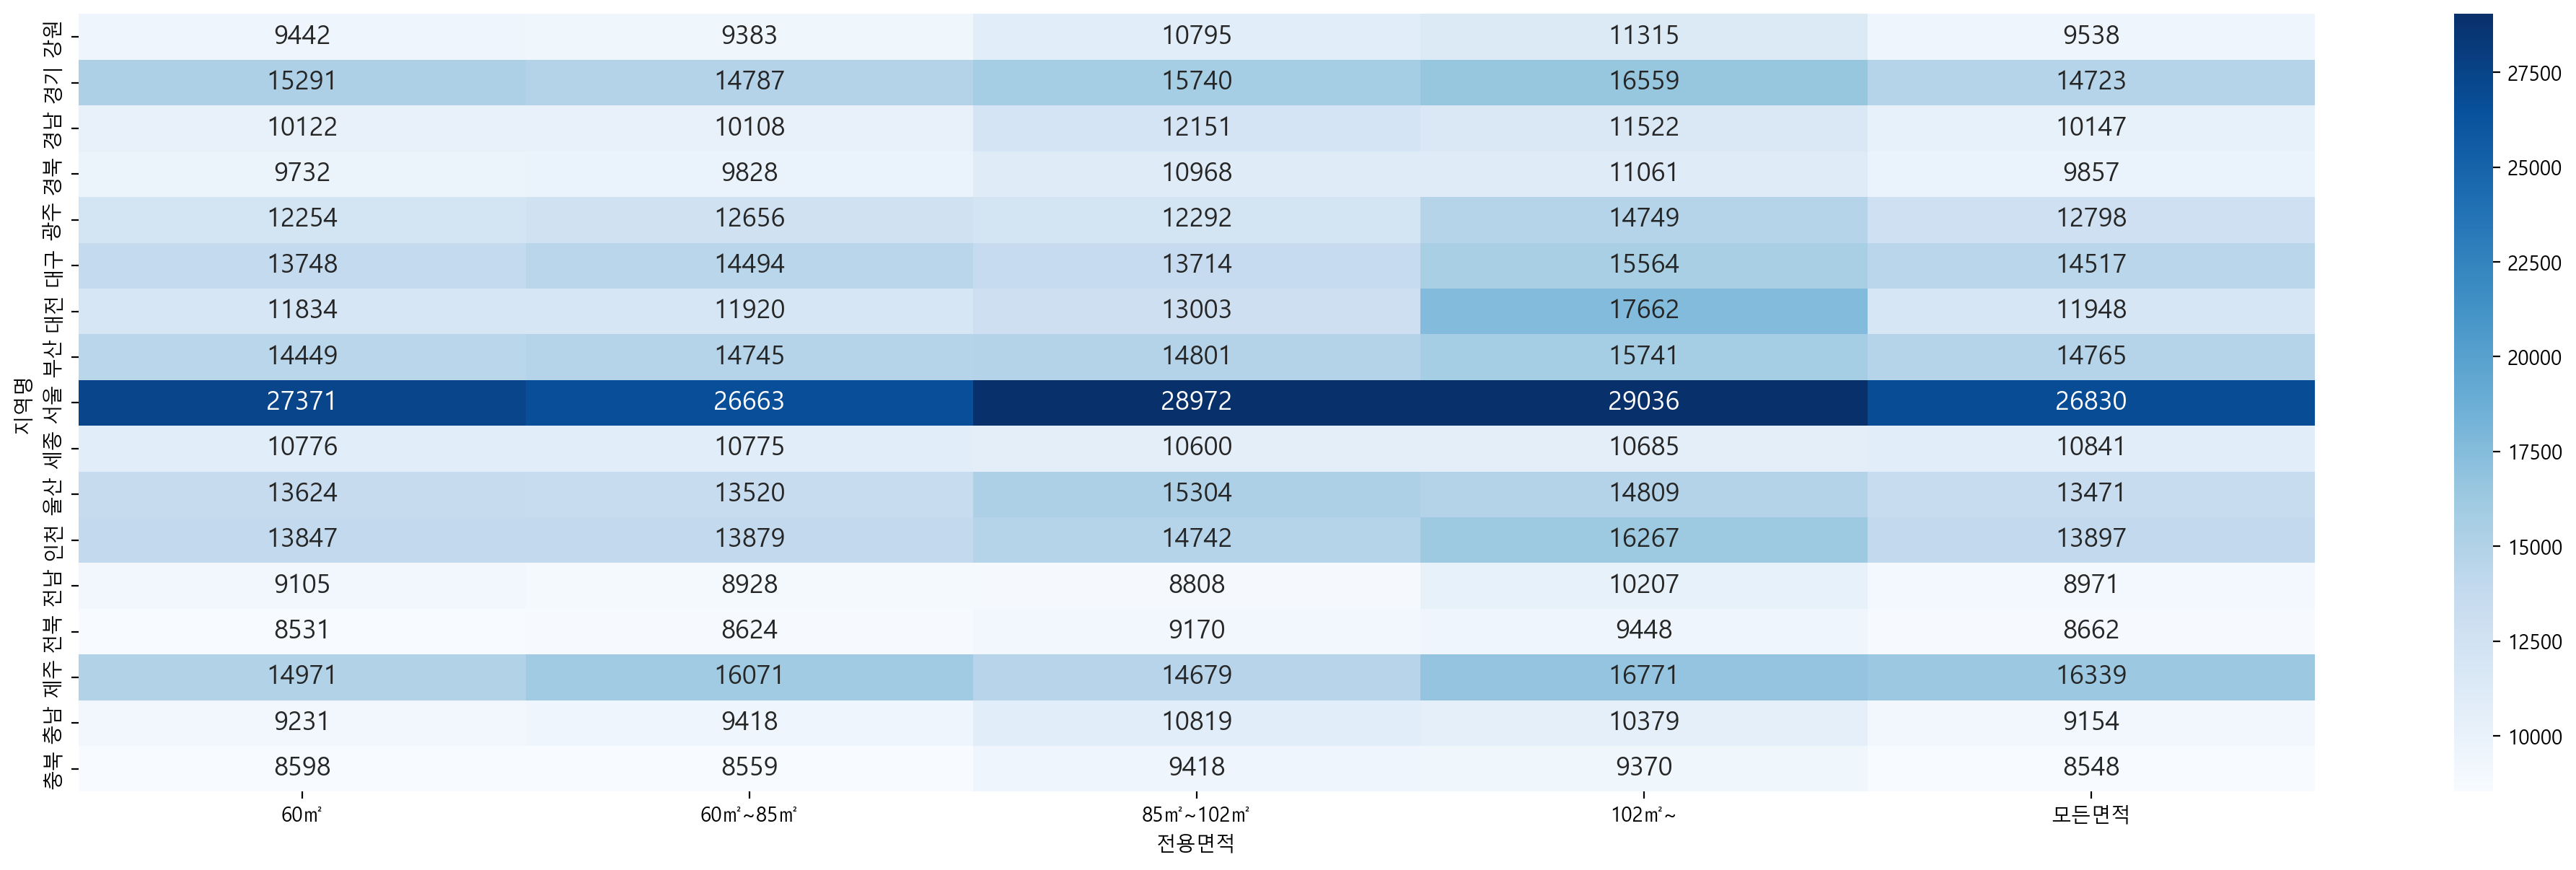

In [56]:
plt.figure(figsize=(25,7))
sns.heatmap(r,cmap='Blues', annot=True, fmt='.0f', annot_kws={'size':13})

## (5) 연도, 지역별 평당분양가격(평균)

In [57]:
df_last.groupby(['연도','지역명'])['평당분양가격'].mean().unstack().T

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
지역명,,,,,,,,,,
강원,7188.060,7162.903846,7318.850000,8219.255000,8934.475000,10302.423214,10291.325000,11644.215000,13409.385000,15622.282500
경기,11060.940,11684.970000,12296.185000,14258.420000,15665.540000,15106.080000,14567.080000,16621.550000,20175.210000,21532.500000
경남,8459.220,8496.730000,8806.600000,9327.670000,10697.615789,10919.272222,11302.335000,12455.685000,13283.182759,13776.571875
경북,7464.160,7753.405000,8288.063793,8680.776923,9050.250000,9997.693750,11227.150000,12018.050000,13025.320000,14085.355263
광주,7916.700,9190.683333,9599.700000,9526.953333,12111.675000,13406.485714,13709.850000,15095.885106,17957.852830,18548.408108
대구,9018.900,10282.030000,12191.972222,12139.252632,14081.650000,15314.200000,15586.285000,16821.915000,17656.747059,24102.283333
대전,8190.600,8910.733333,9912.910526,10234.106667,12619.200000,11238.844737,11994.216667,14113.880000,17917.288889,19881.922500
부산,10377.400,10743.535000,11637.615000,12889.965000,13537.865000,13353.010000,14317.655000,18166.835593,20470.850847,22900.267500
서울,20315.680,21753.435000,21864.095000,23202.245000,28286.830000,29781.015000,29380.450000,29128.531034,33230.560000,38981.827500


<Axes: xlabel='지역명', ylabel='연도'>

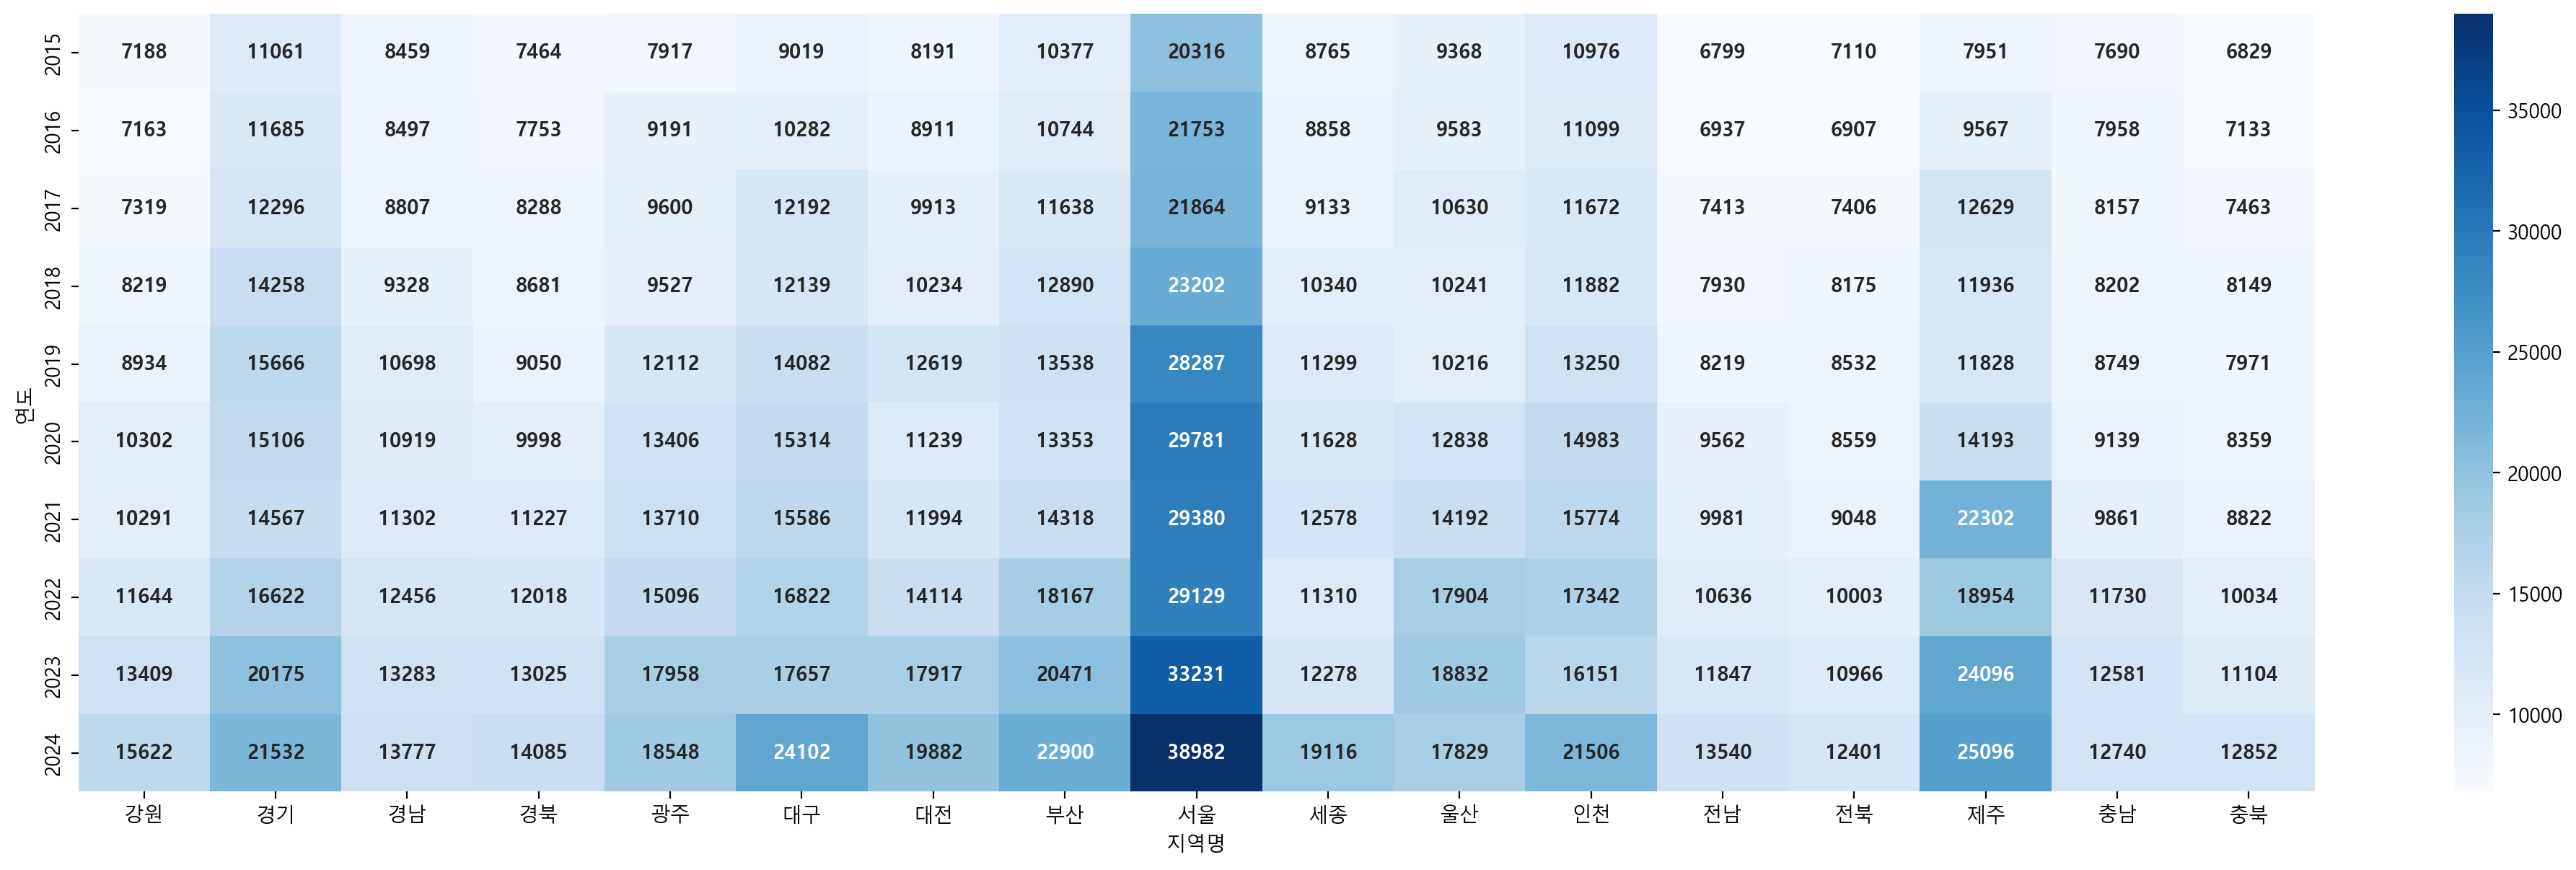

In [58]:
r = df_last.pivot_table(index='연도',columns='지역명',values='평당분양가격')
plt.figure(figsize=(25,7))
sns.heatmap(r,cmap='Blues', annot=True, fmt='.0f', annot_kws={'weight':'bold'})

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

# 8. matplotlib으로 시각화(위의 도표)
https://www.research.autodesk.com/publications/same-stats-different-graphs/
## (1) 지역별 결측치를 제외한 데이터수(line, bar)

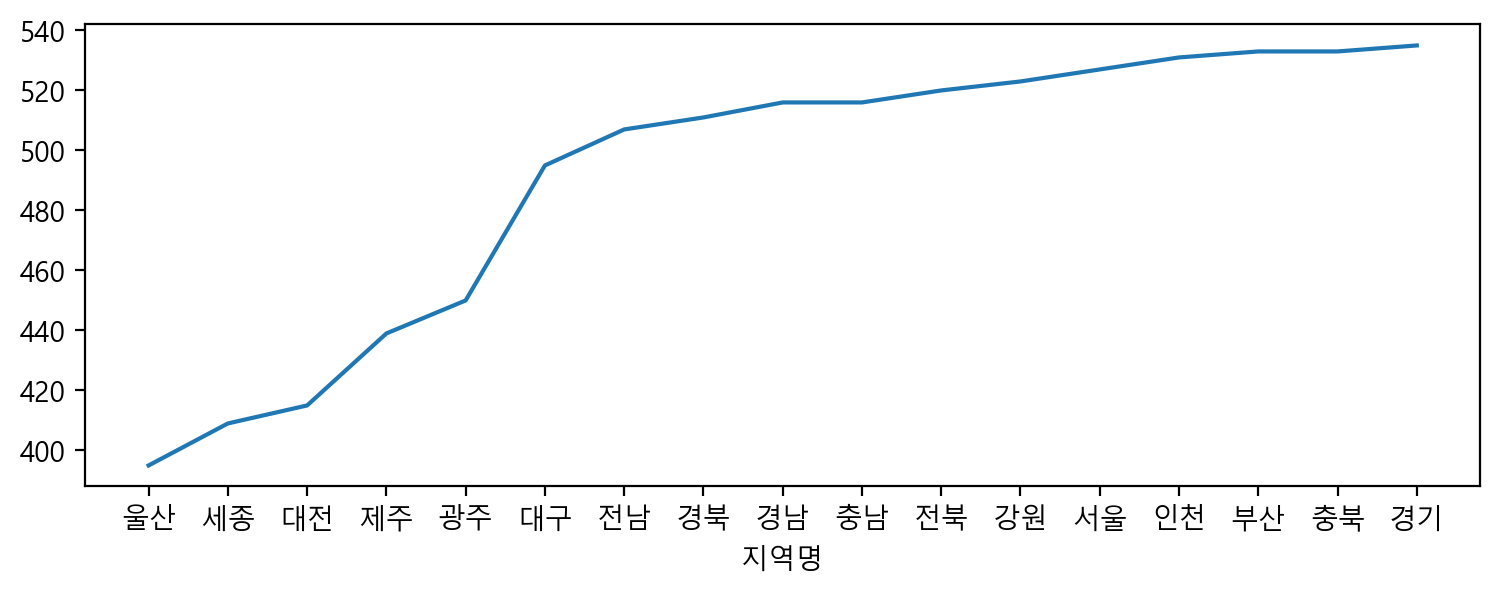

In [59]:
result = df_last.groupby('지역명')['평당분양가격'].count().sort_values()
plt.figure(figsize=(9,3))
ax = result.plot.line()
ax.set_xticks(range(len(result)))
ax.set_xticklabels(result.index, rotation=0)
plt.show()

<Axes: xlabel='지역명'>

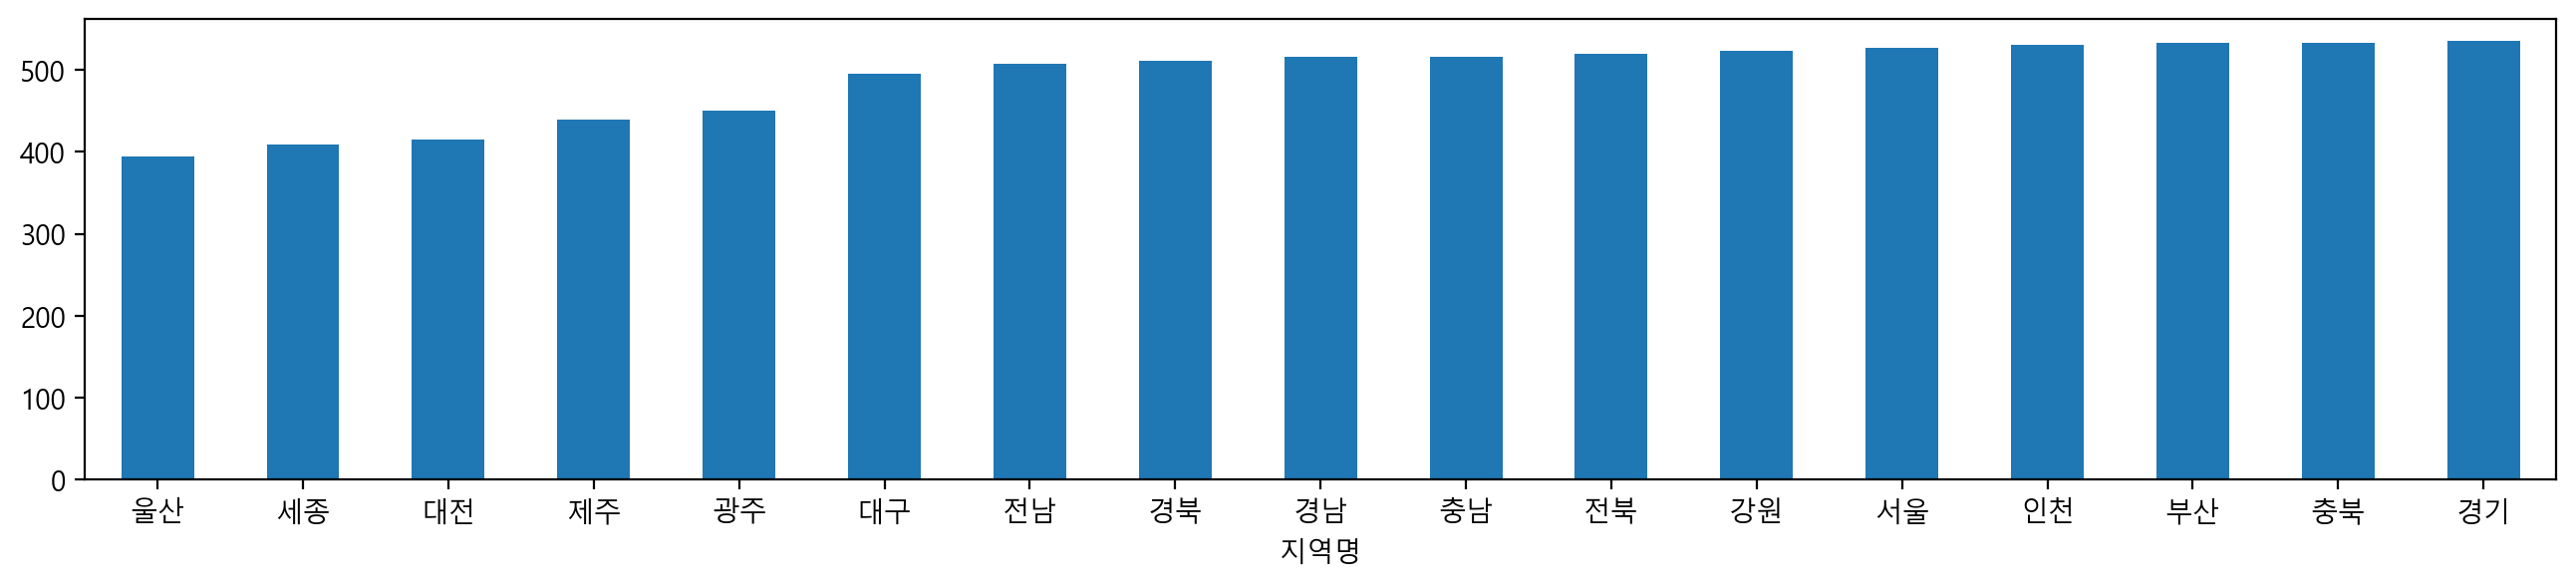

In [60]:
result.plot.bar()
result.plot(kind='bar', figsize=(16,3), rot=0)

## (2) 지역별 평당분양가격 (line, bar)

<Axes: xlabel='지역명'>

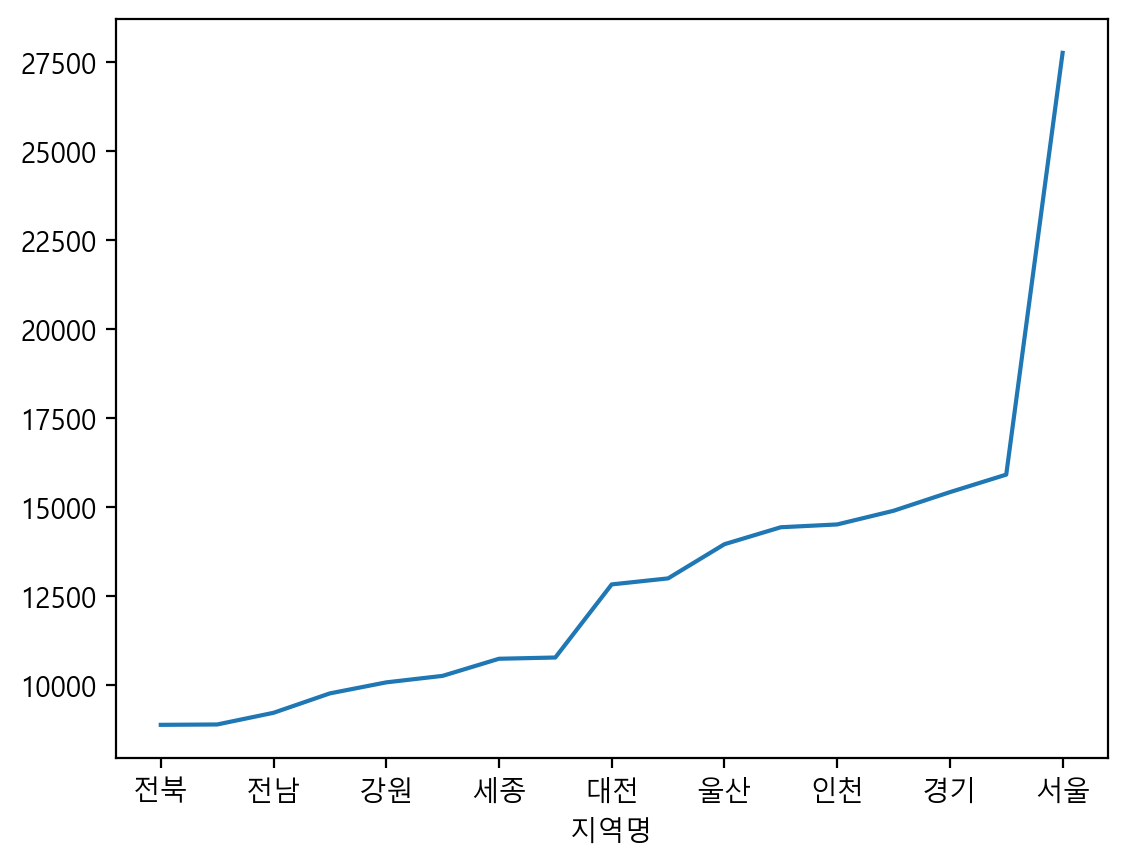

In [61]:
df_last.groupby('지역명')['평당분양가격'].mean().sort_values().plot(kind='line')

<Axes: xlabel='지역명'>

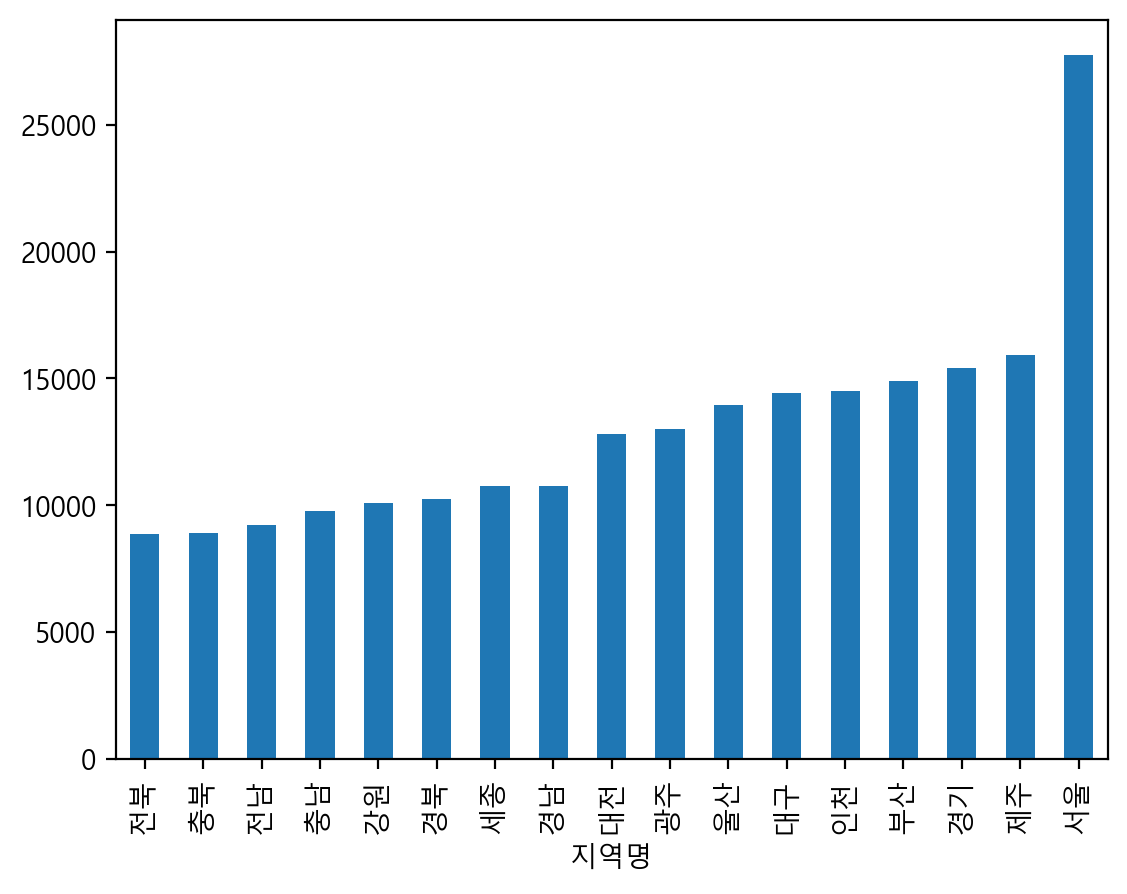

In [62]:
df_last.groupby('지역명')['평당분양가격'].mean().sort_values().plot(kind='bar')

## (3) 전용면적별 평당분양가격(barplot)

In [63]:
result = df_last.groupby('전용면적')['평당분양가격'].mean().sort_values()
result

전용면적
60㎡         12522.774427
60㎡~85㎡     12619.048827
모든면적        12654.068098
85㎡~102㎡    13447.672835
102㎡~       14066.826846
Name: 평당분양가격, dtype: float64

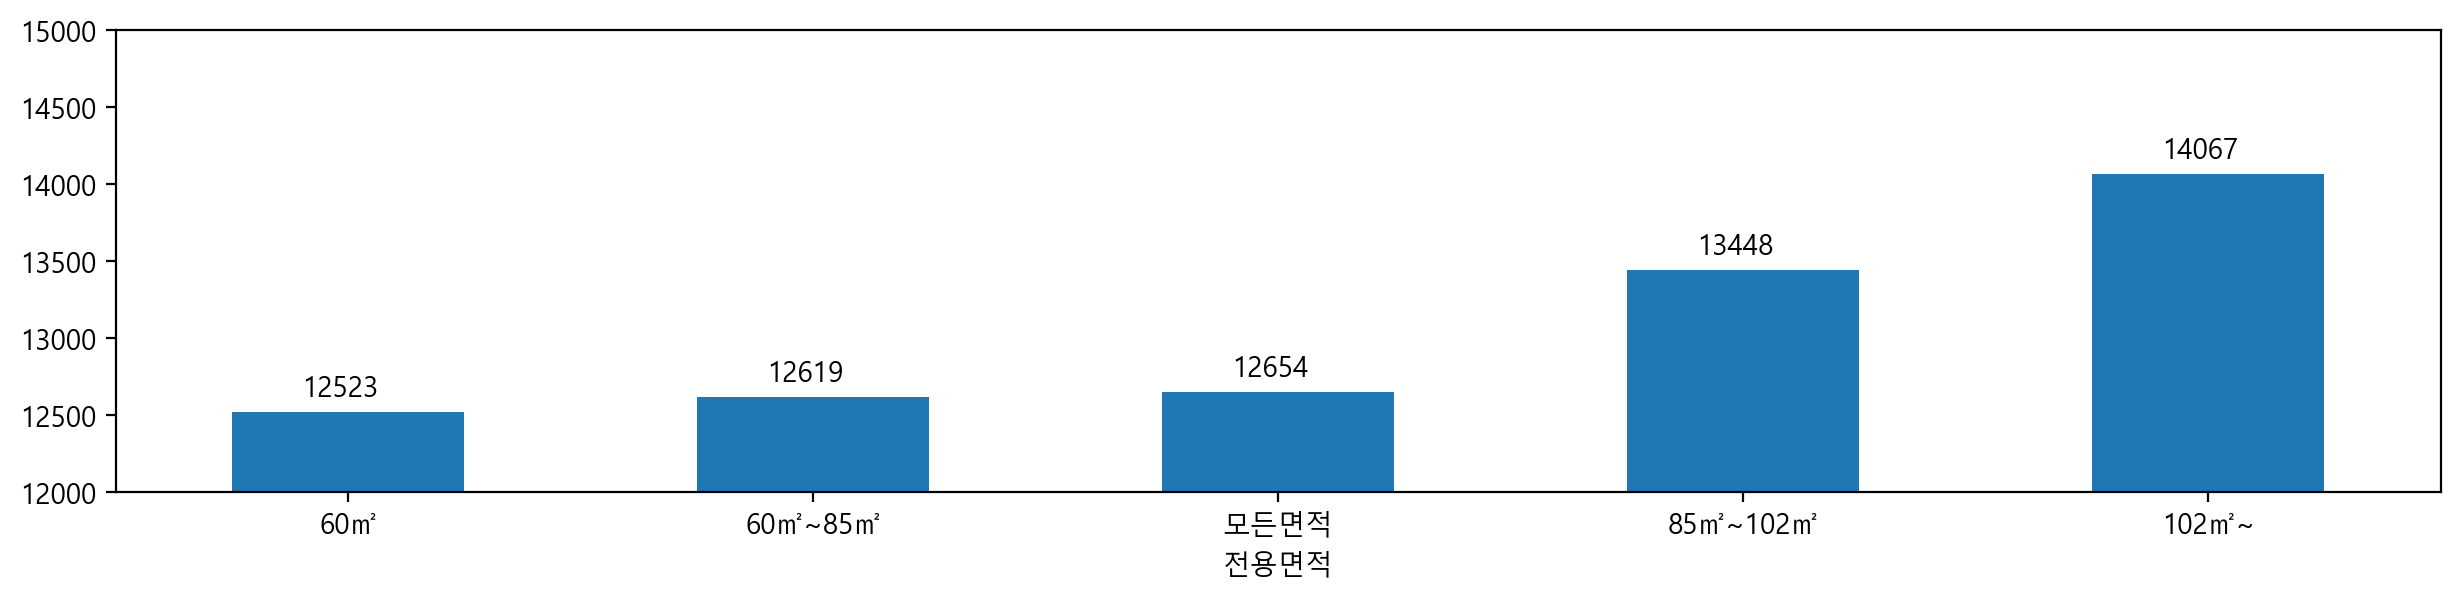

In [64]:
ax =result.plot(kind='bar', figsize=(15,3), rot=0)
ax.set_ylim(12000, 15000)
for idx, val in enumerate(result):
    ax.text(idx-0.1,val+100, round(val))

## (4) 연도별 평균 평당분양가격(line)

<Axes: xlabel='연도'>

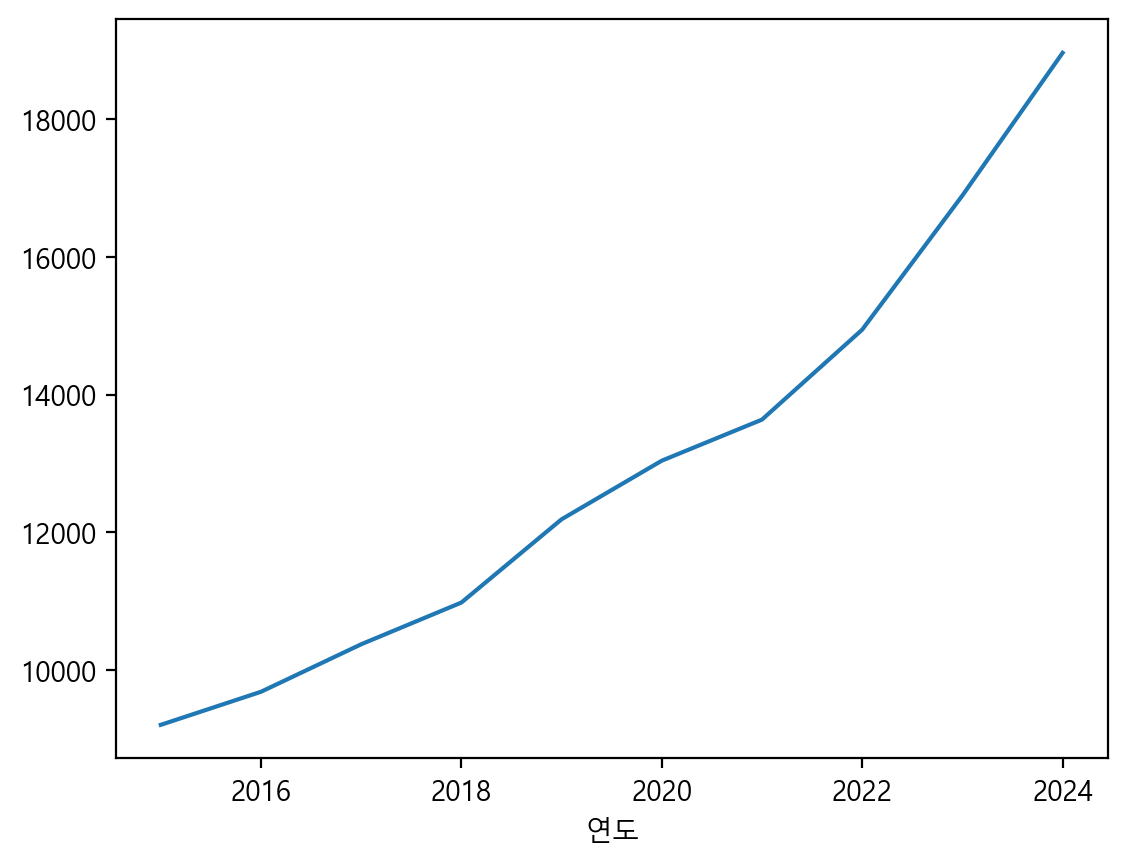

In [65]:
df_last.groupby('연도')['평당분양가격'].mean().plot.line()

In [66]:
result = df_last.groupby('연도')['평당분양가격'].mean()
result

연도
2015     9202.735802
2016     9683.025000
2017    10372.928923
2018    10978.938411
2019    12188.293092
2020    13039.422449
2021    13636.022540
2022    14942.504494
2023    16890.920657
2024    18962.919231
Name: 평당분양가격, dtype: float64

In [67]:
for year, val in result.items():
    print(year,val)

2015 9202.735802469135
2016 9683.025
2017 10372.928923076923
2018 10978.938411316649
2019 12188.293092105261
2020 13039.42244897959
2021 13636.022539682539
2022 14942.504494382021
2023 16890.92065677966
2024 18962.91923076923


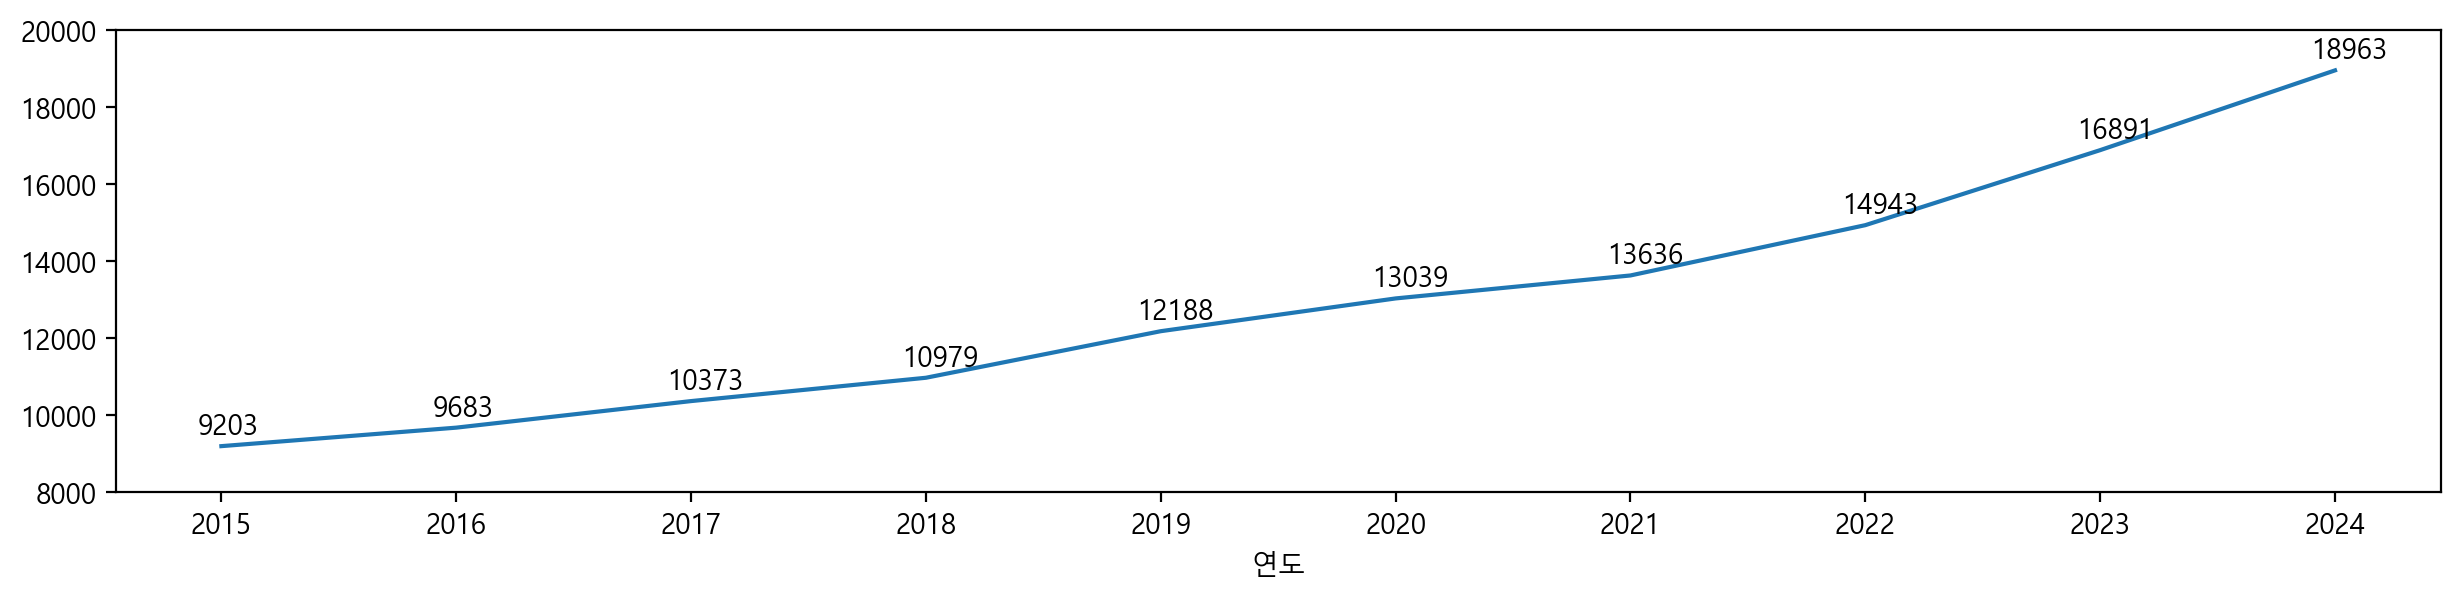

In [68]:
result.plot.line(figsize=(15,3))
plt.ylim([8000, 20000])
plt.xticks(range(2015,2025))
for year, val in result.items():
    plt.text(year-0.1, val+300, round(val), fontsize=10)

범례:https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

# 9. seaborn으로 시각화
- 위에서 시각화한 내용을 seaborn으로 시각화

In [69]:
sns.set(style='white', rc={'figure.figsize':(9,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

## (1) 지역별 평당분양가격

<Axes: xlabel='지역명', ylabel='평당분양가격'>

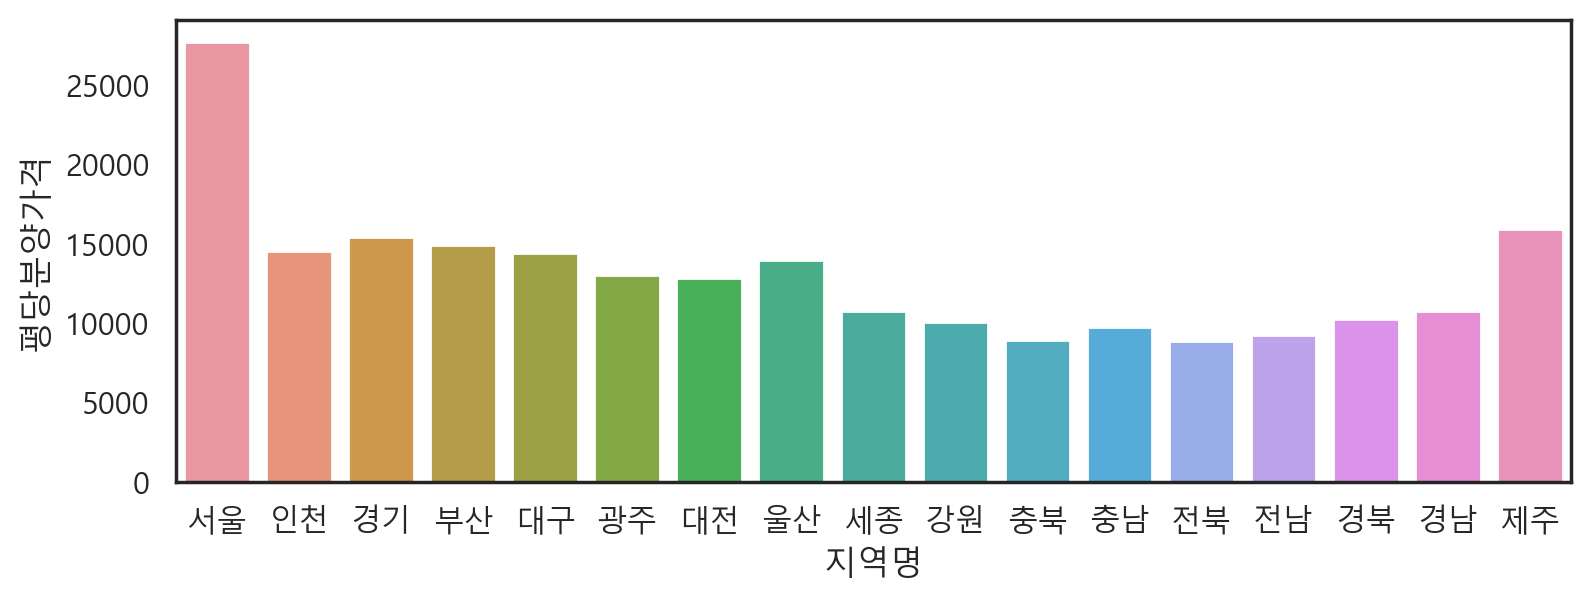

In [70]:
sns.barplot(data=df_last, x='지역명', y='평당분양가격', errorbar=None)

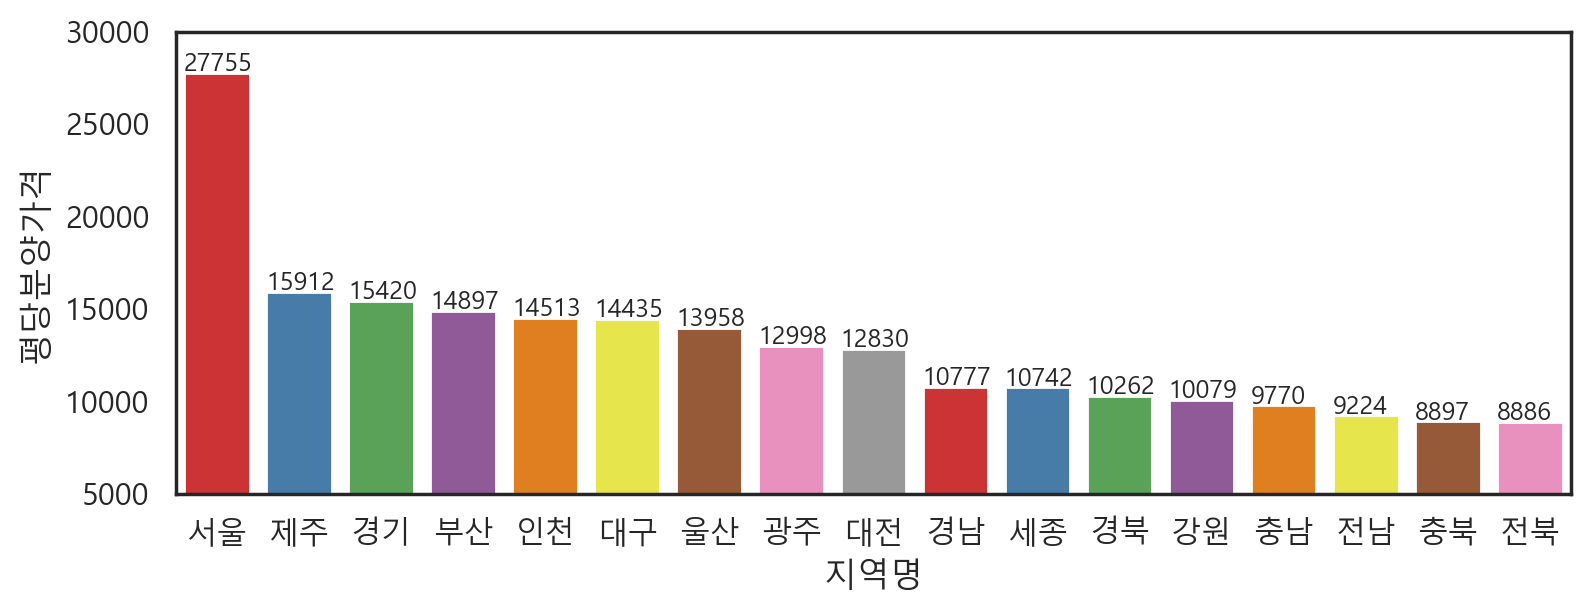

In [71]:
# 위 barplot + sort + 값 annot + 값출력
result = df_last.groupby('지역명')['평당분양가격'].mean().sort_values(ascending=False)
result.index
sns.barplot(data=df_last, x='지역명', y='평당분양가격', errorbar=None, order=result.index, palette='Set1')
for idx, val in enumerate(result):
    plt.text(idx-0.4, val+100, round(val), fontsize=9)
plt.ylim(5000,30000)
plt.show()

## (2) 연도별 평당분양가격

In [72]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     9095 non-null   object 
 1   연도      9095 non-null   int64  
 2   월       9095 non-null   int64  
 3   평당분양가격  8355 non-null   float64
 4   전용면적    9095 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


<Axes: xlabel='연도', ylabel='평당분양가격'>

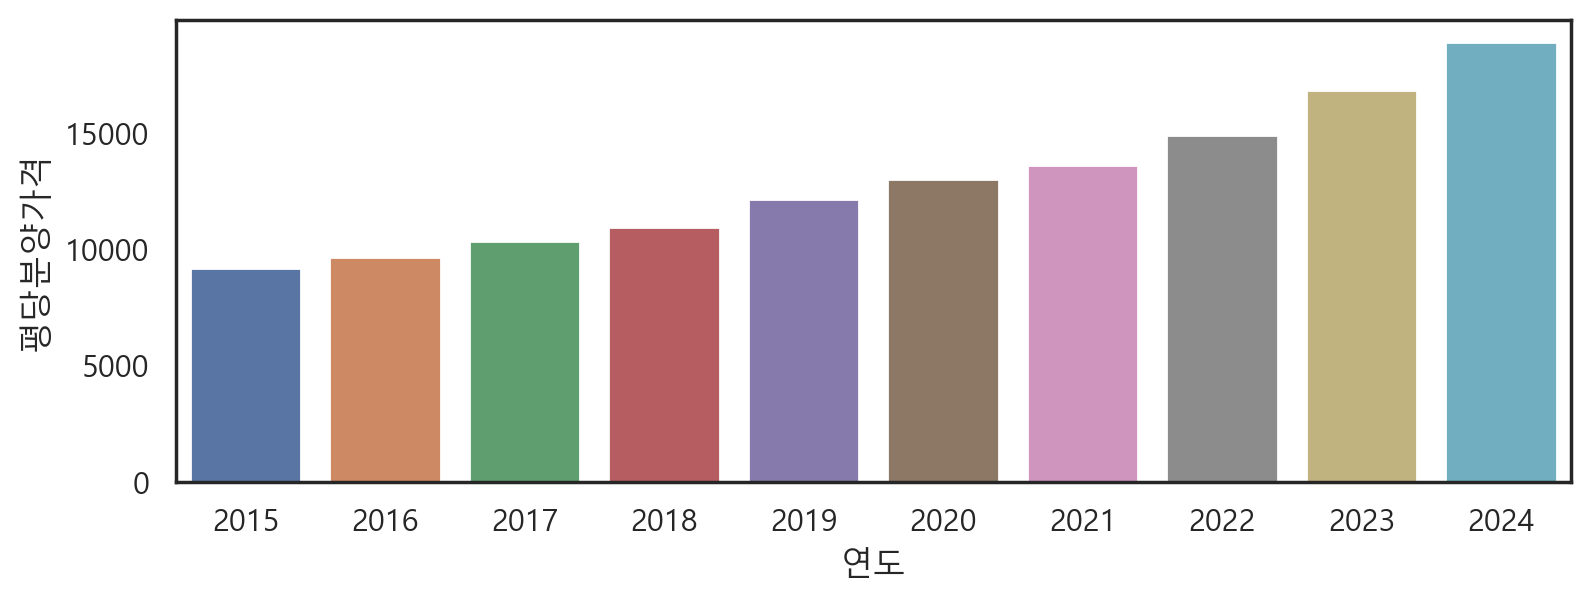

In [73]:
sns.barplot(data=df_last, x='연도', y='평당분양가격', errorbar=None)


## (3) 그 외 lineplot, relplot, boxplot, violinplot, boxexplot, regplot, swarmplot

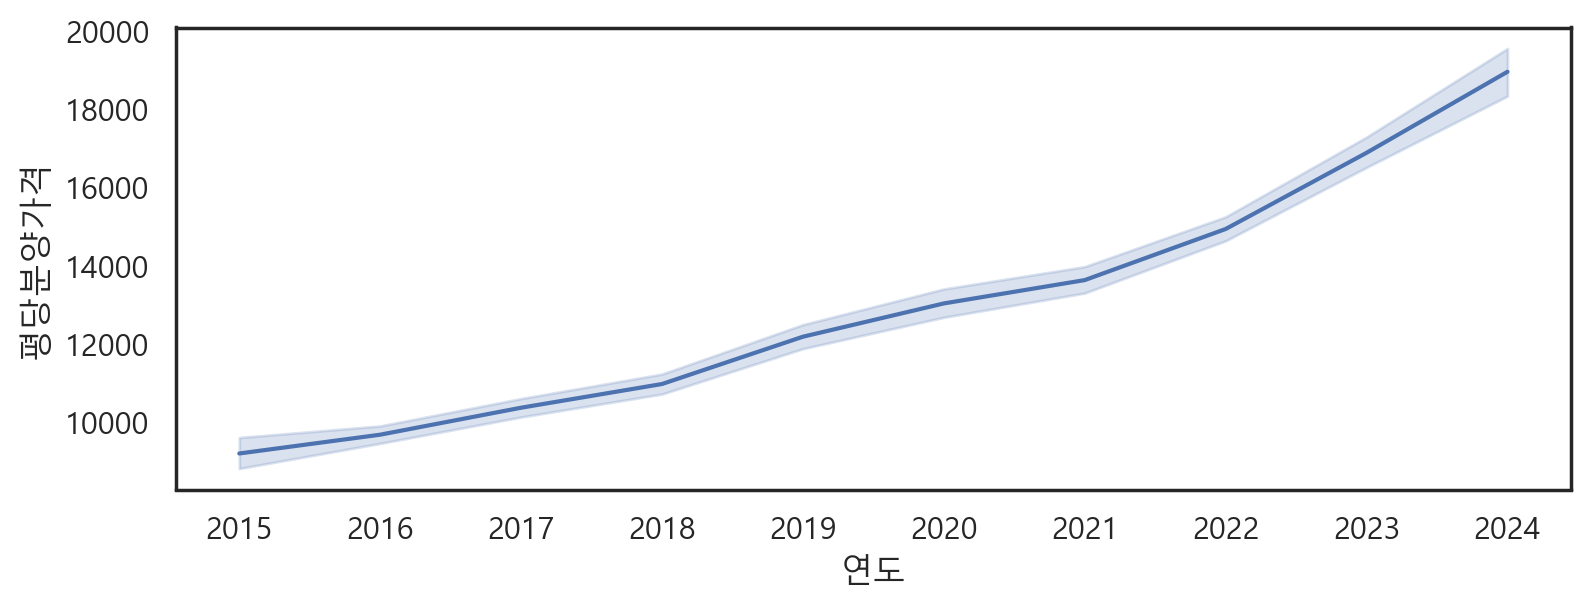

In [74]:
sns.lineplot(data=df_last, x='연도',y='평당분양가격')
plt.xticks(range(2015,2025))
plt.show()

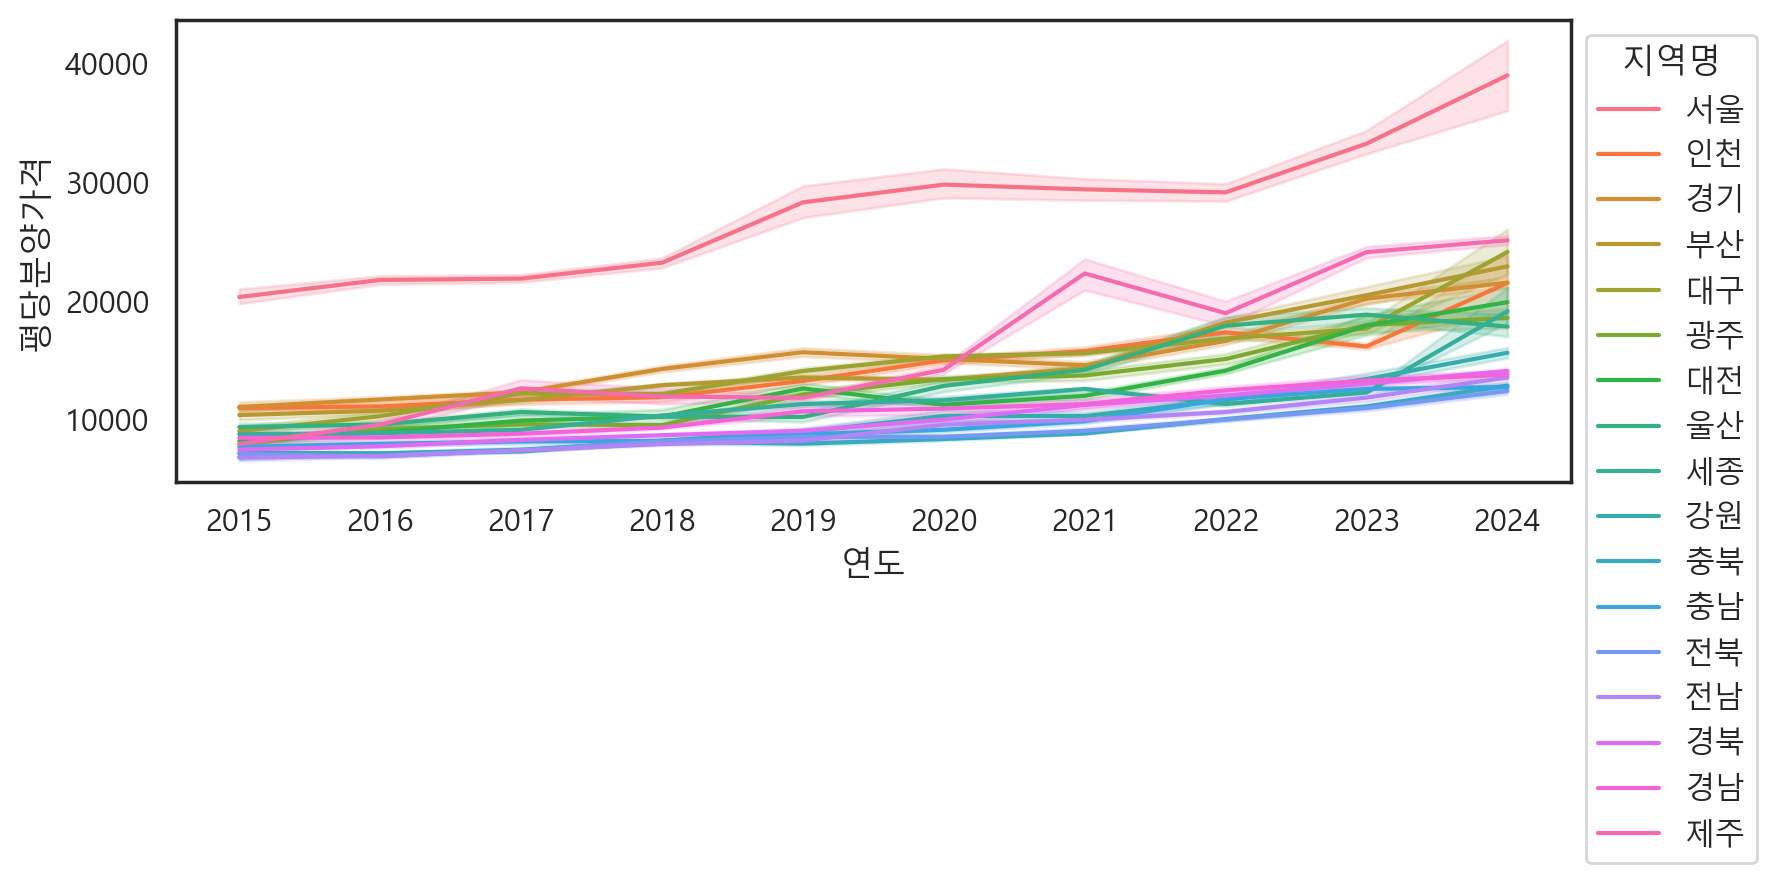

In [75]:
# 연도별 평당분양가격의 추이 - 지역별
ax = sns.lineplot(data=df_last, x='연도',y='평당분양가격', hue='지역명')
plt.xticks(range(2015,2025))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()


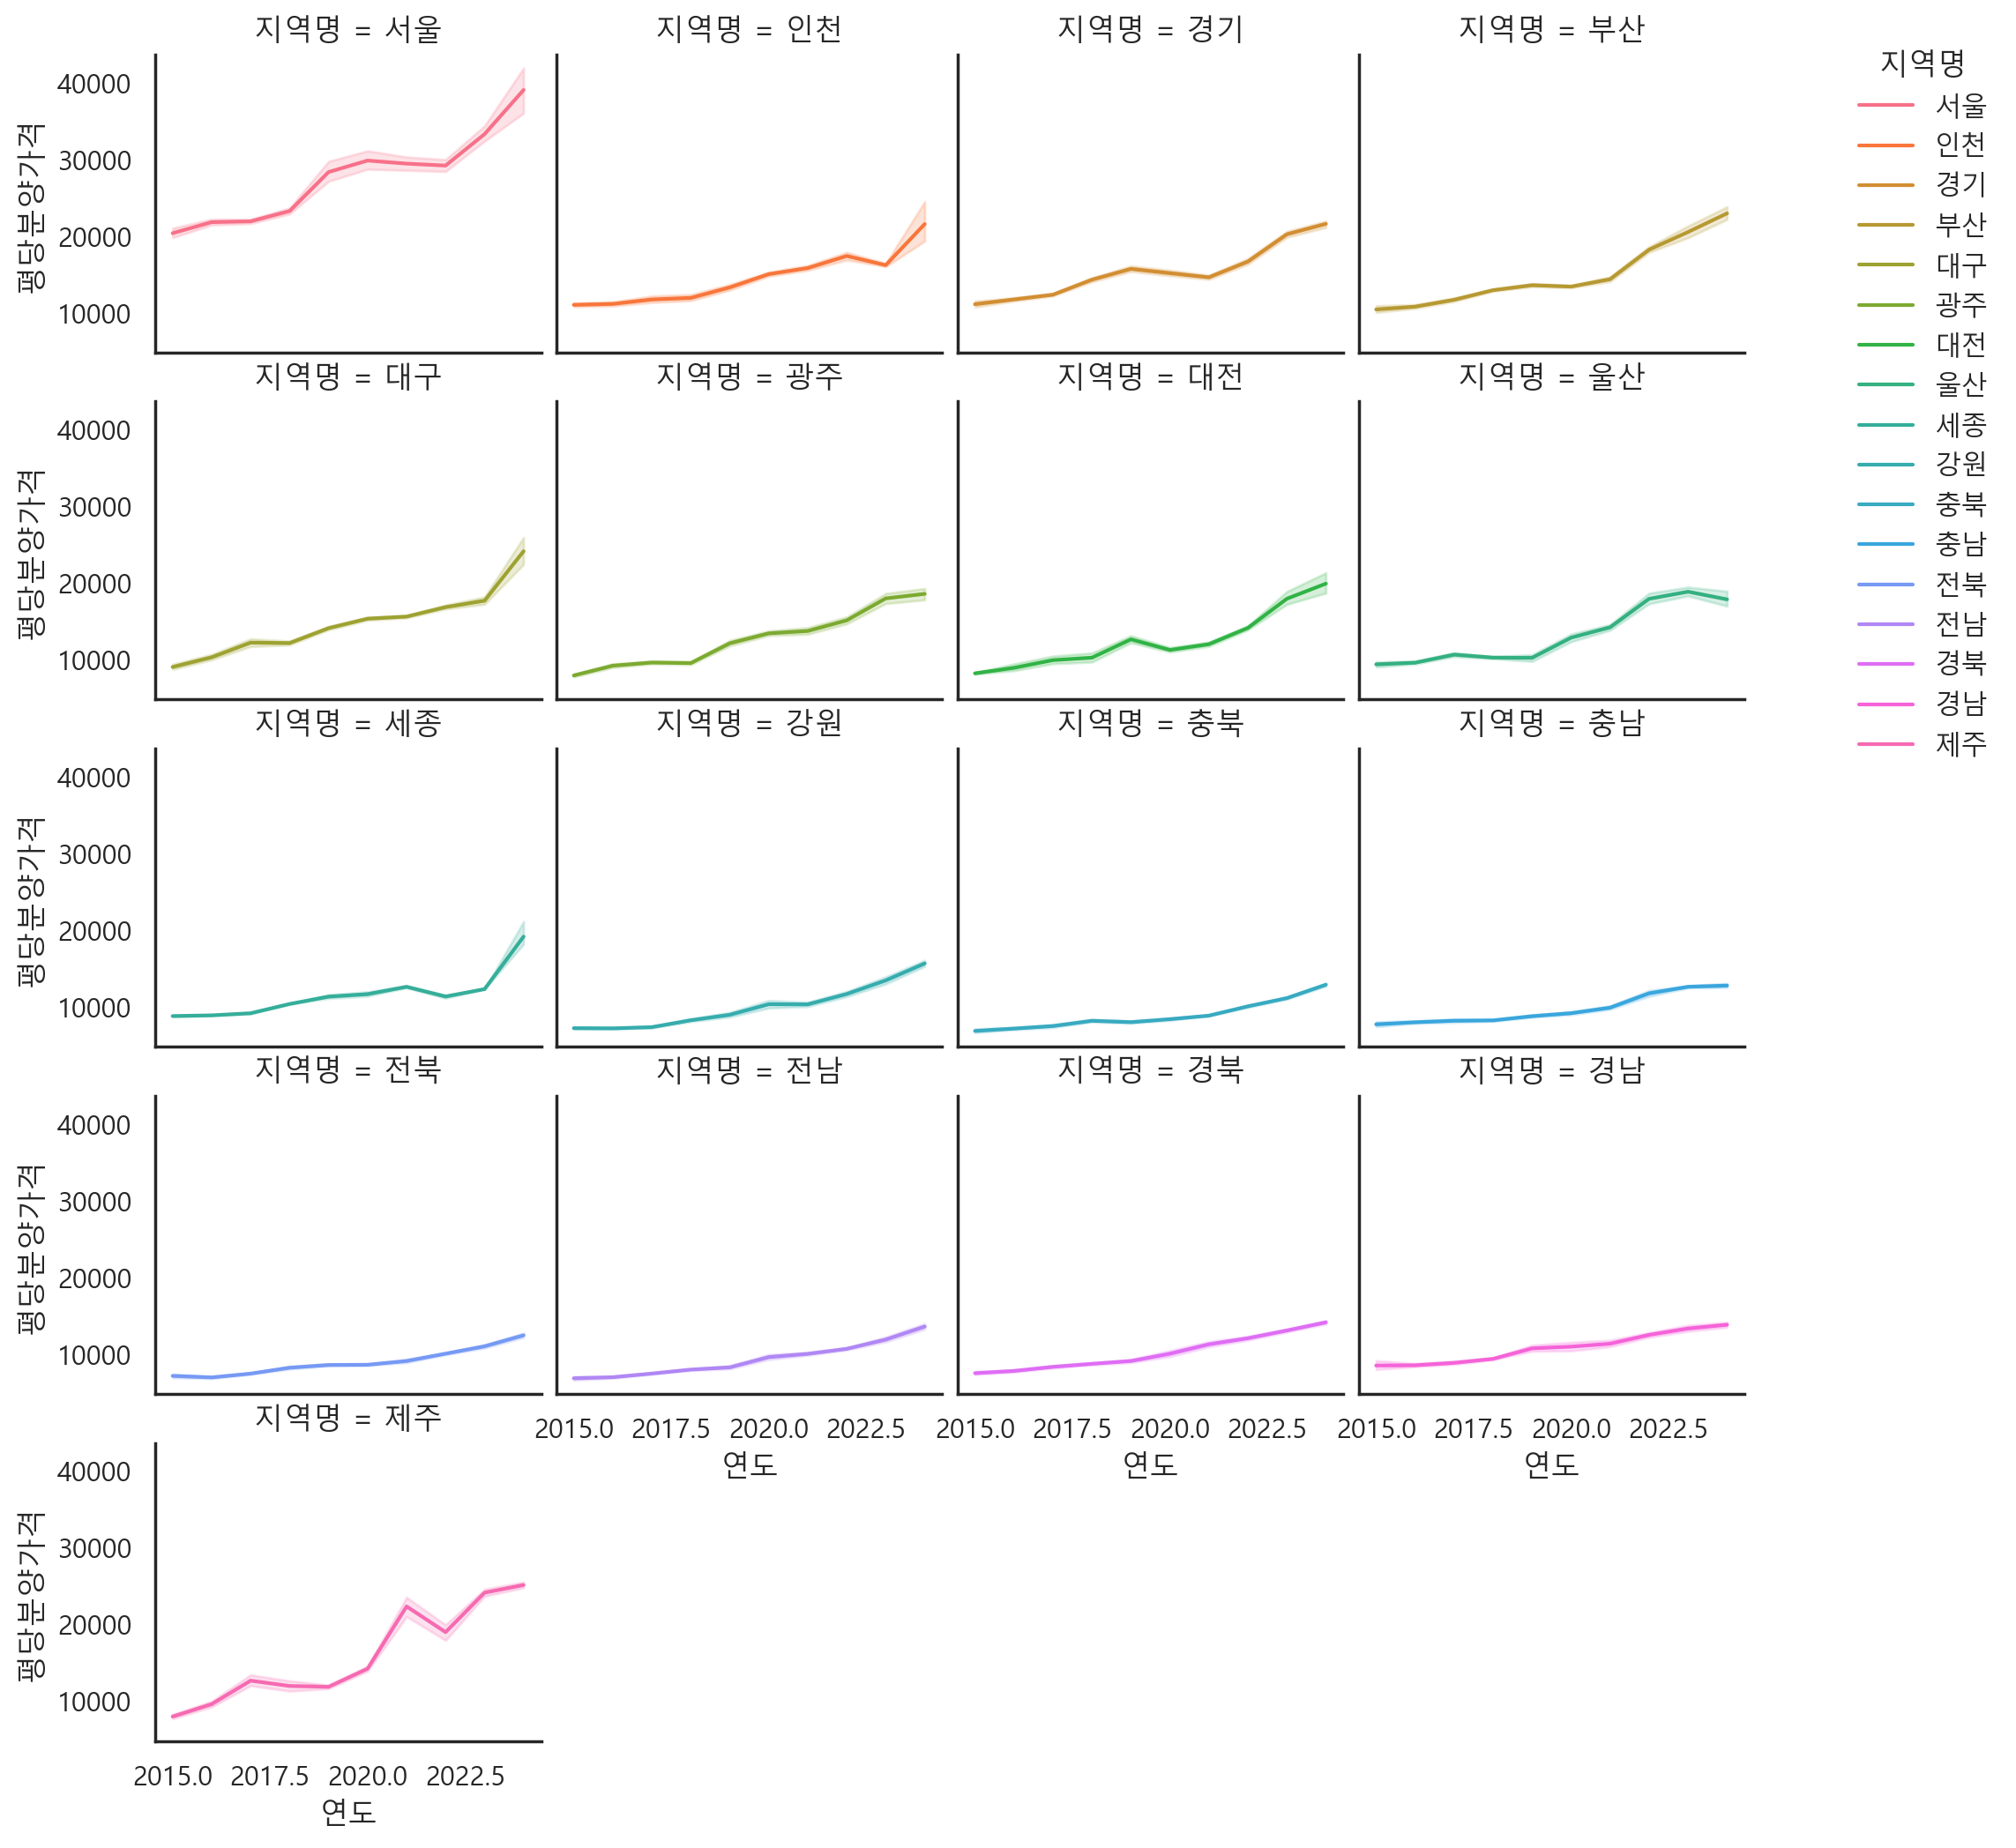

In [76]:
g = sns.relplot(data=df_last, x='연도',y='평당분양가격',hue='지역명',kind='line',col='지역명', col_wrap=4)
g.fig.set_size_inches(10,10)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

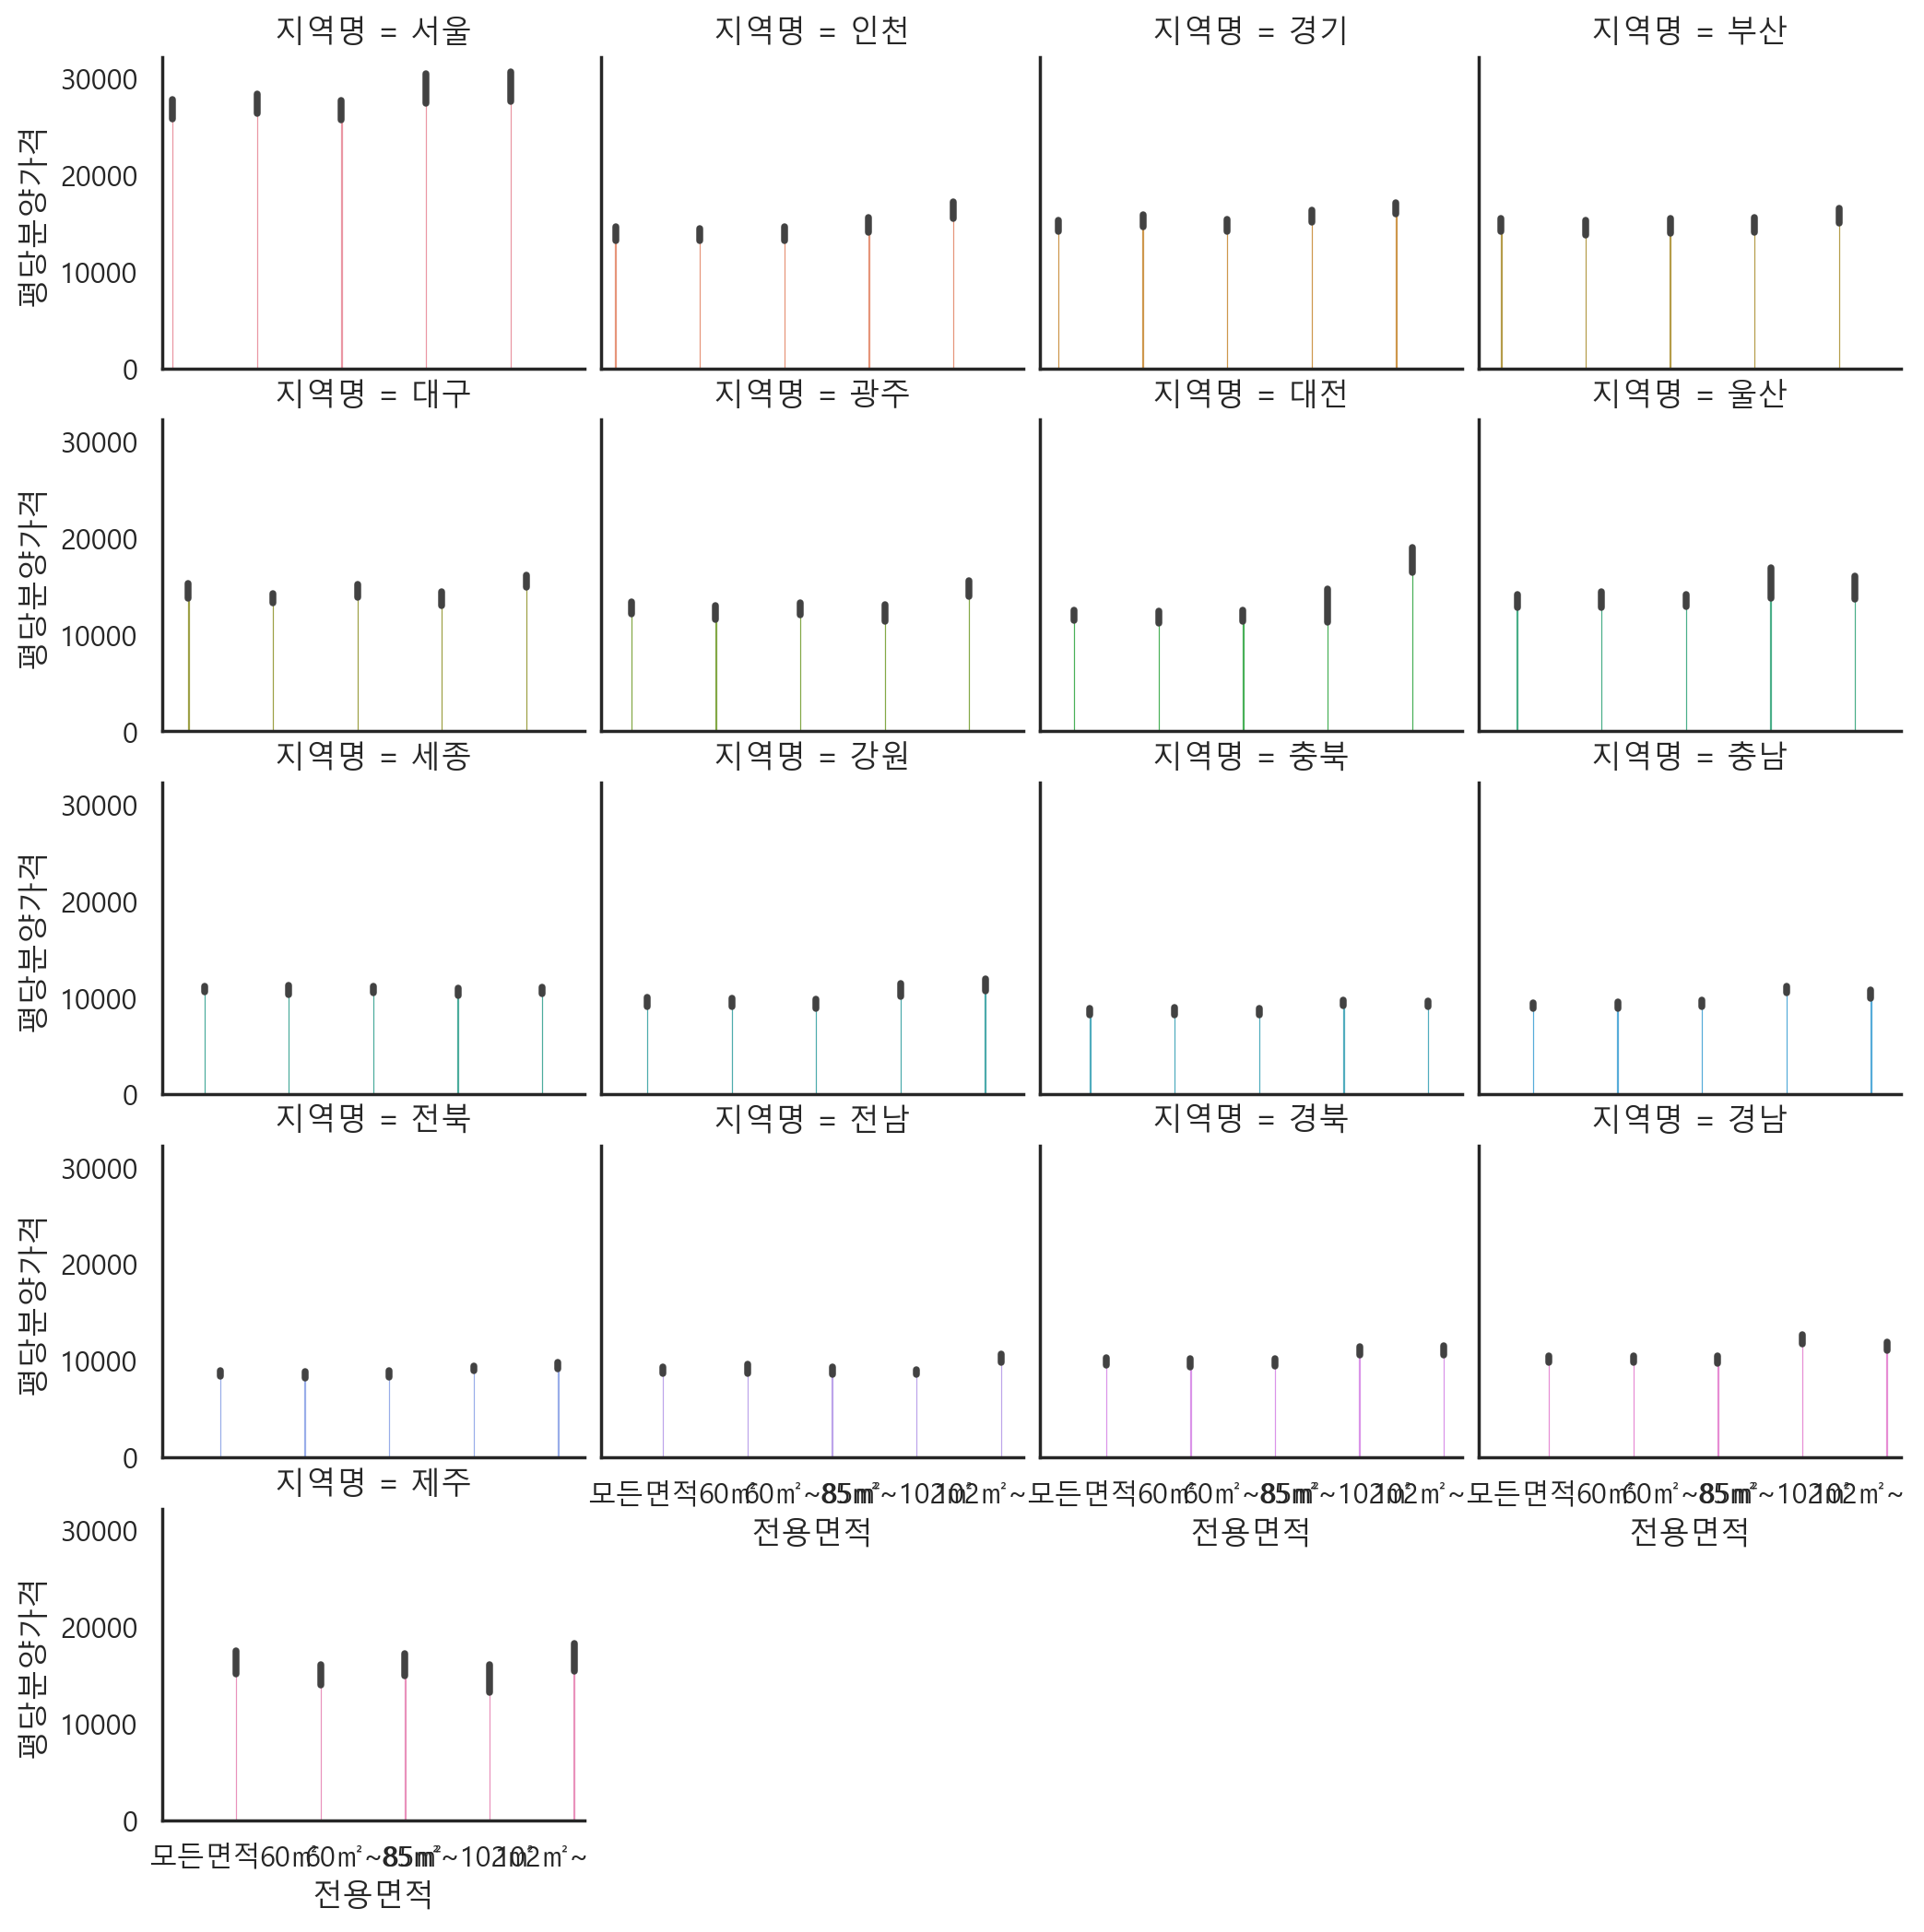

In [77]:
g = sns.catplot(data=df_last, x='전용면적',y='평당분양가격',hue='지역명',kind='bar',col='지역명', col_wrap=4)
g.fig.set_size_inches(10,10)

<Axes: xlabel='전용면적', ylabel='평당분양가격'>

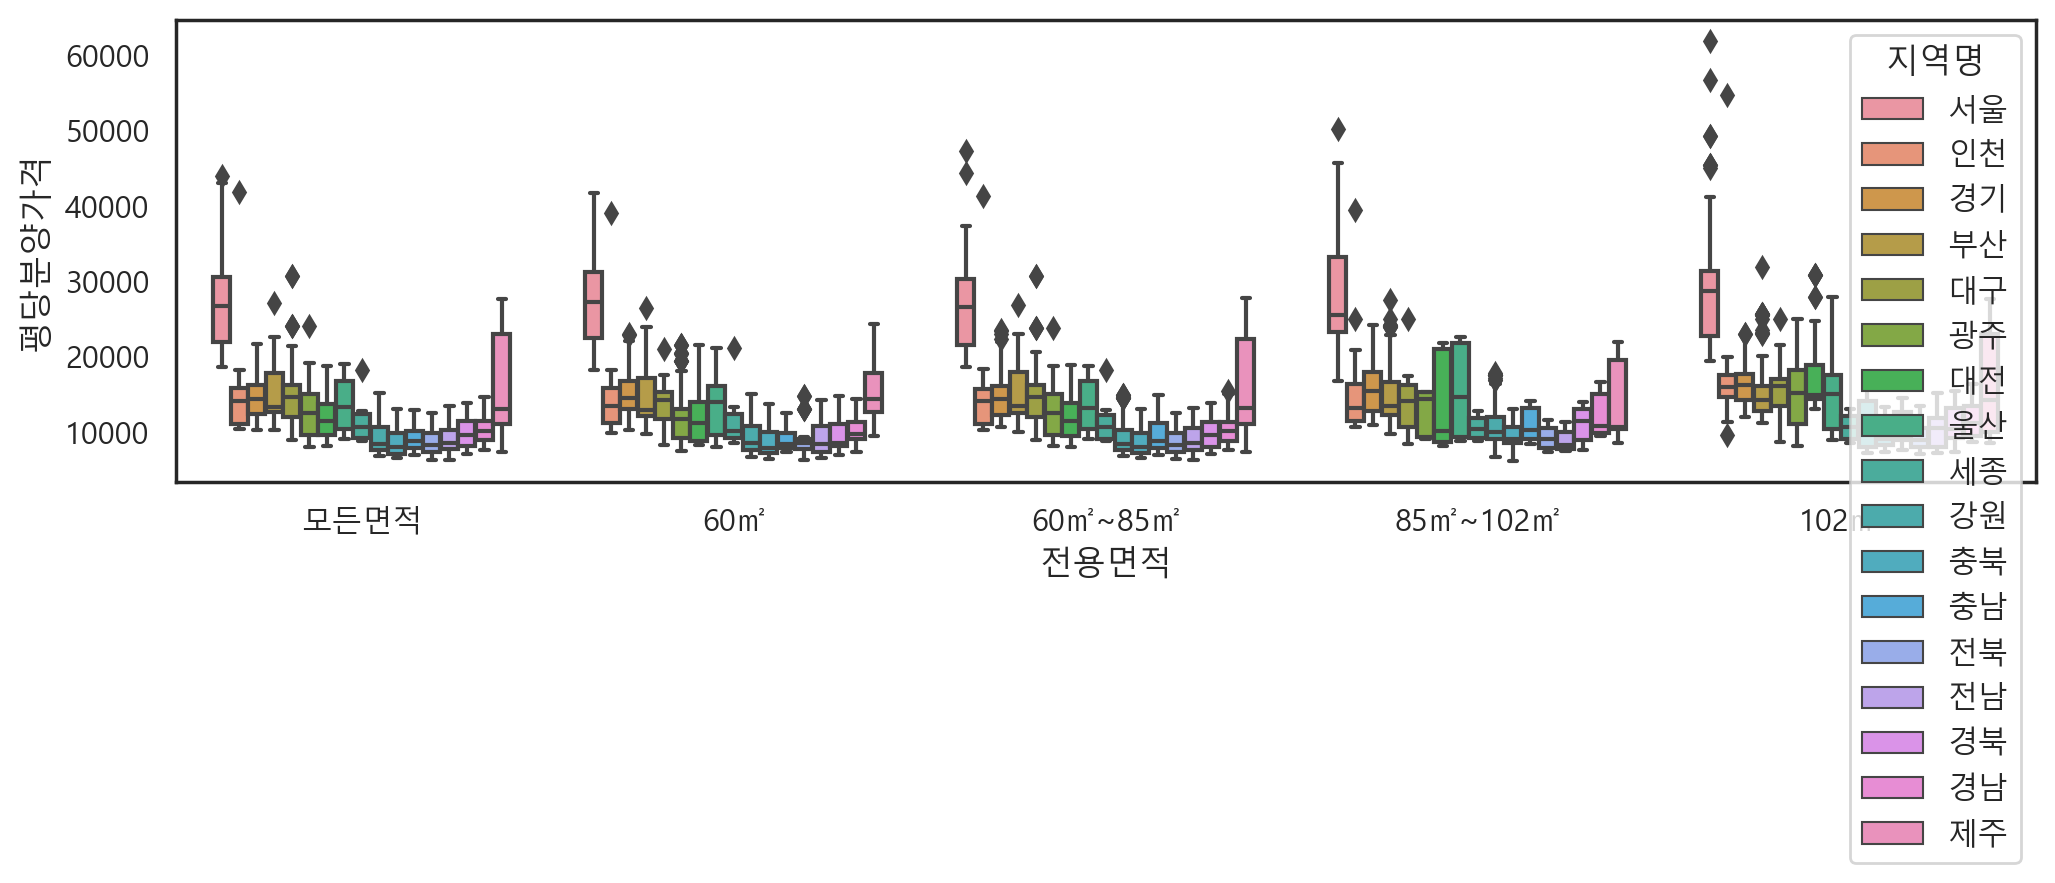

In [78]:
plt.figure(figsize=(12, 3))
sns.boxplot(data=df_last, x="전용면적", y="평당분양가격", hue="지역명")

# 5월 8일 수업전 설정

In [231]:
# 패키지 import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 선명도 높임
%config InlineBackend.figure_format = 'retina'
#플롯 설정
sns.set(style='white', rc={'figure.figsize':(15,3)})
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
# warning 숨기기
import warnings
warnings.filterwarnings(action='ignore')
# 데이터 로드
df_last = pd.read_csv('data/ch13/df_last.csv')
df_last.sample(1)

,지역명,연도,월,평당분양가격,전용면적
8926,서울,2024,7,41685.6,60㎡


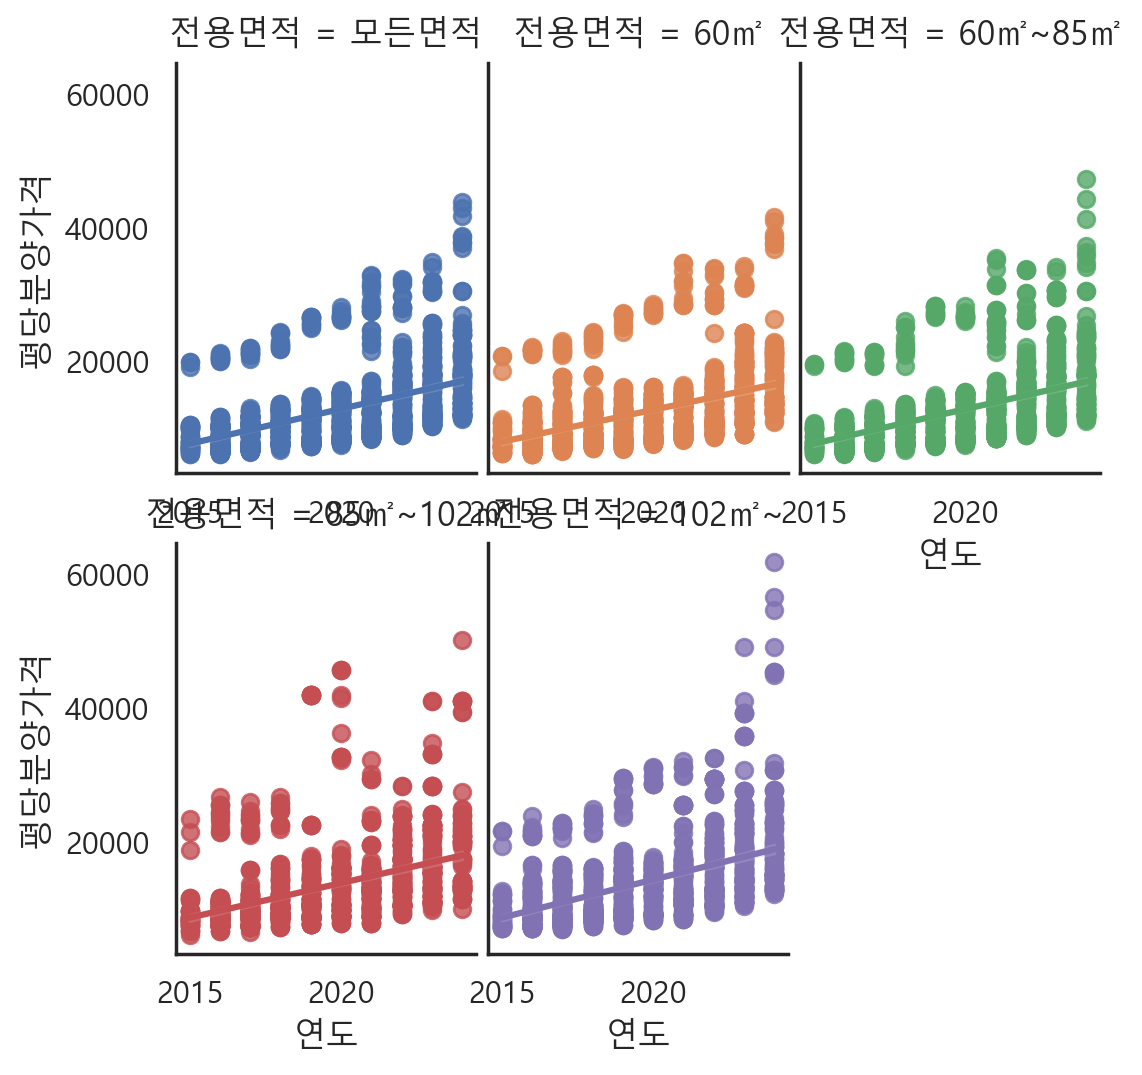

In [232]:
# 연도에 따른 평당 분양가격을 회기식으로 시각화(regplot) : hue기능 X,  lmplot : hue기능 O
g = sns.lmplot(data=df_last, x='연도',y='평당분양가격', hue='전용면적', col='전용면적', col_wrap=3, sharex=False)
g.fig.set_size_inches(5,5)
plt.show()

In [ ]:
# 분포를 나타내는 swamplot
sns.swarmplot(data=df_last, x='연도',y='평당분양가격')
plt.show()

KeyboardInterrupt: 

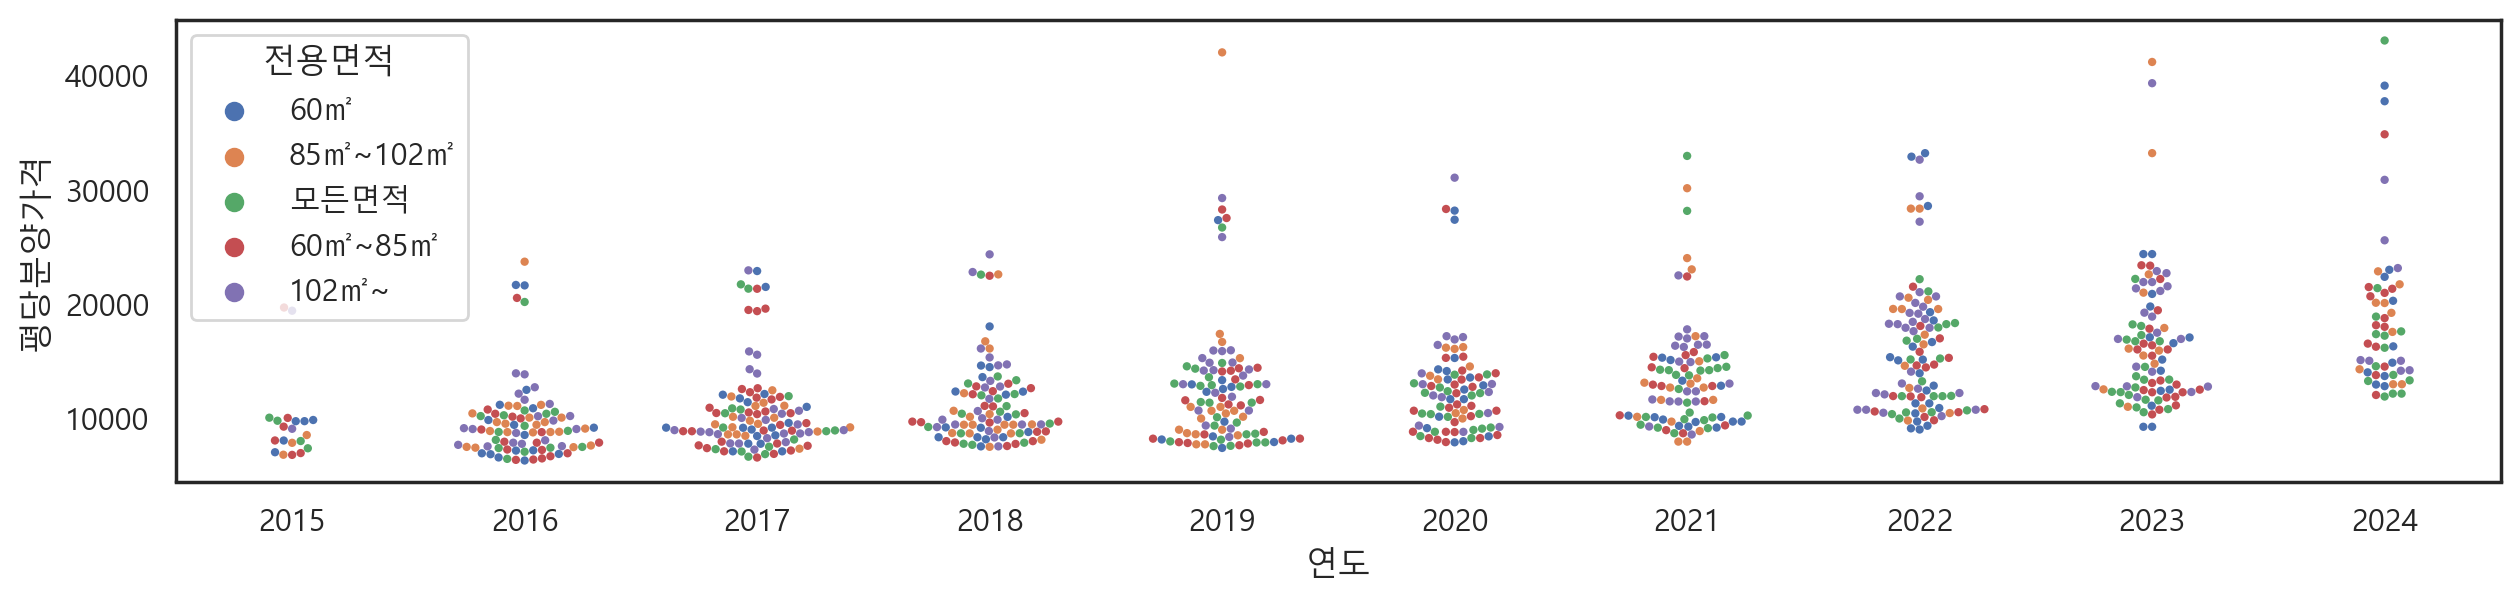

In [ ]:
# 분포를 나타내는 swamplot(많은 데이터->샘플링)
df_sample = df_last.sample(frac=0.1, random_state=12)
sns.swarmplot(data=df_sample, x='연도',y='평당분양가격', hue='전용면적', size=3)
plt.show()

In [ ]:
# 분포를 나타내는 swamplolt(많은 데이터 추출)
from sklearn.model_selection import train_test_split
_, df_sample = train_test_split(df_last, test_size=0.1, stratify=df_last['연도'])

<Axes: >

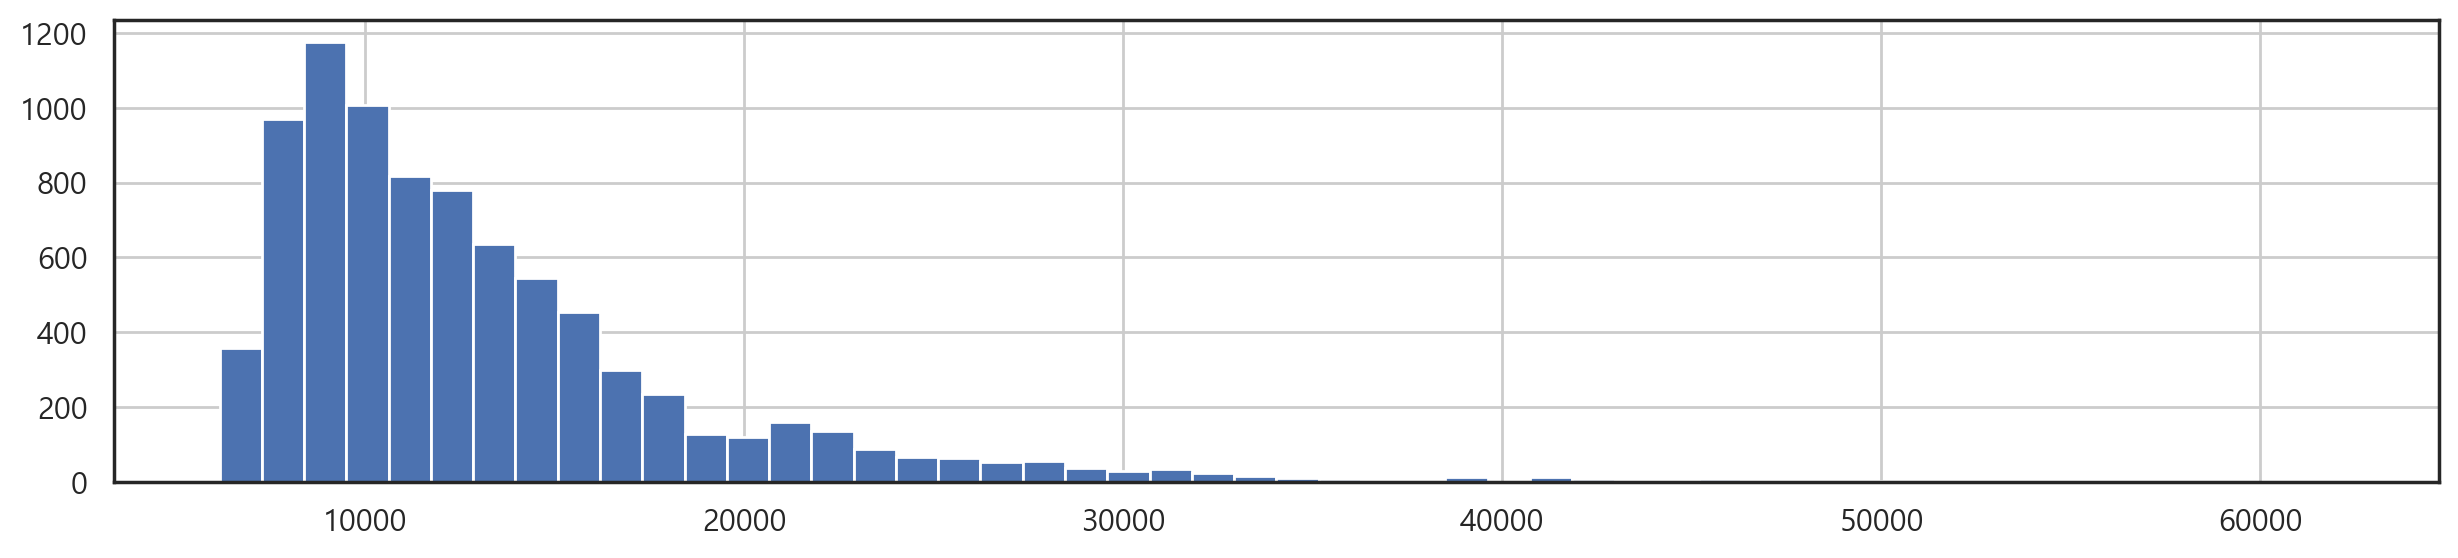

In [ ]:
df_last['평당분양가격'].hist(bins=50)

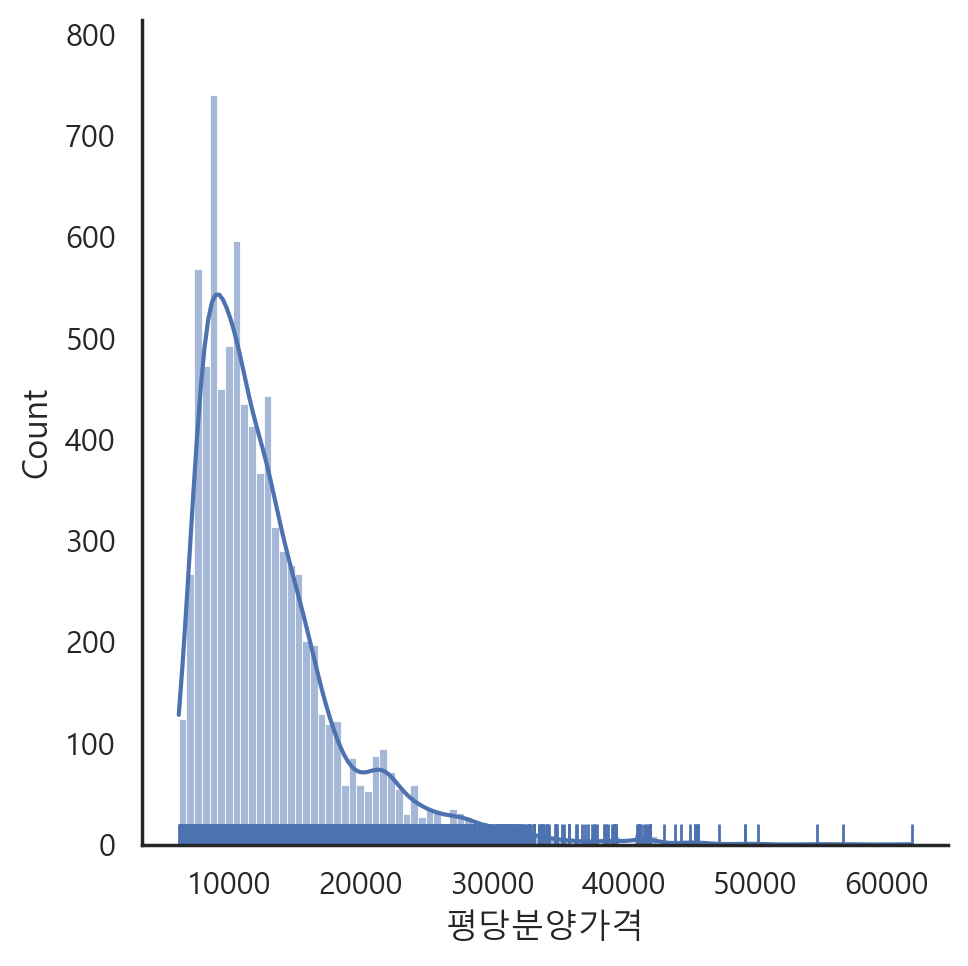

In [ ]:
sns.displot(data=df_last, x='평당분양가격', kde='True', rug=True)

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용(교안 20page)

# 10. 구조가 다른 df_first와 df_last를 연결 후 분석
## (1) concat
- new_first :df_first를 [지역명, 연도, 월, 평당분양가격]으로 변환
- new_last : df_last를 [지역명, 연도, 월, 평당분양가격]으로 변환
                (전용면적이 모든면적인 행만 추출후, 전용면적 열을 삭제)

In [114]:
df_first = pd.read_csv('C:/ai_x/download/부동산_250213/지역_연도별_평당가격.csv', encoding='cp949')
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [118]:
new_first = df_first.melt(id_vars='지역', var_name='연도월',value_name='평당분양가격')
new_first.head()

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [123]:
# 연도 return
def parse_year(data):
    return int(data.split('년')[0])
parse_year('2013년12월')

2013

In [136]:
# 월 return
def parse_month(data):
    return int(data.split('년')[1][:-1])
parse_month('2013년12월')

12

In [ ]:
# 연도 컬럼 추가
new_first['연도'] = new_first['연도월'].map(lambda data : int(data.split('년')[0]))
new_first.sample()

,지역,연도월,평당분양가격,연도
117,경남,2014년6월,6615,2014


In [ ]:
# 월 컬럼 추가
new_first['월'] = new_first['연도월'].map(lambda data : int(data.split('년')[1][:-1]))
new_first.sample(5)

,지역,연도월,평당분양가격,연도,월
271,제주,2015년3월,7826,2015,3
197,충북,2014년11월,6724,2014,11
96,충남,2014년5월,6591,2014,5
258,인천,2015년3월,9876,2015,3
117,경남,2014년6월,6615,2014,6


In [ ]:
# 연도월 컬럼 삭제
new_first.drop('연도월', axis=1, inplace=True)
new_first.sample(5)

,지역,평당분양가격,연도,월
39,대전,8321,2014,2
262,경기,10469,2015,3
251,전남,5833,2015,2
134,경남,6613,2014,7
326,인천,10443,2015,7


In [ ]:
# 컬럼명 바꾸기
new_first.columns = ['지역명','평당분양가격','연도','월']
new_first.sample(5) # new_first concat 준비 완료료

,지역명,평당분양가격,연도,월
311,대전,8079,2015,6
39,대전,8321,2014,2
164,충남,6882,2014,9
317,충남,6939,2015,6
281,강원,6924,2015,4


In [ ]:
new_last = df_last[df_last.전용면적 == '모든면적'].copy()
new_last.drop('전용면적',axis=1,inplace=True)
new_last

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
9070,전북,2024,8,12058.2
9075,전남,2024,8,13120.8
9080,경북,2024,8,13827.0
9085,경남,2024,8,13252.8


In [193]:
df = pd.concat( [new_first,new_last] )
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9045, 9050, 9055, 9060, 9065, 9070, 9075, 9080, 9085, 9090],
           dtype='int64', length=2176)

In [194]:
# df의 index reset
df = df.reset_index(drop=True)

In [195]:
df = df[['지역명','연도','월','평당분양가격']]
df.head()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0


## (2) 결측치 대체(연도별, 지역별 중위값)

In [162]:
df.isna().sum()

지역명        0
연도         0
월          0
평당분양가격    26
dtype: int64

In [164]:
df[df['평당분양가격'].isna()].head()

,지역명,연도,월,평당분양가격
1010,울산,2018,12,NaN
1027,울산,2019,1,NaN
1044,울산,2019,2,NaN
1061,울산,2019,3,NaN
1078,울산,2019,4,NaN


In [182]:
# 연도별 지역별 중앙값으로 결측치 대체 방법1
fillnavalue = df.pivot_table(index='연도',columns='지역명',values='평당분양가격',aggfunc='median' )
fillnavalue

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.00,10855.00,6473.00,6168.00,6098.00,8080.00,8321.00,8111.00,18189.00,7601.0,8090.00,10204.00,5678.00,6282.00,7674.00,6365.00,6589.00
2014,6350.00,10449.00,6611.50,6555.00,7617.00,8317.00,8327.00,9233.00,19070.50,8067.0,8153.00,10018.00,5716.00,6335.00,7900.00,6724.50,6593.50
2015,6986.00,10518.00,7665.00,7006.00,7914.00,8542.00,8079.00,9515.00,19275.30,8669.0,9192.00,10443.00,6243.00,6583.00,7365.60,6975.00,6705.60
2016,6964.65,11342.10,7865.55,7385.40,8987.55,10335.60,8380.35,10414.80,20654.70,8860.5,10127.70,10531.95,6491.10,6369.00,9329.10,7377.15,6801.30
2017,7057.05,11919.60,8052.00,7835.85,9551.85,11231.55,9035.40,11851.95,21402.15,9018.9,11488.95,10875.15,7114.80,7222.05,10885.05,7448.10,6765.00
2018,7669.20,13099.35,8898.45,8667.45,9678.90,12178.65,9807.60,12926.10,22567.05,10388.4,10312.50,11233.20,7774.80,7652.70,11649.00,8030.55,7870.50
2019,8221.95,14487.00,9791.10,8723.55,12071.40,13963.95,11866.80,13061.40,26428.05,11411.4,10362.00,12827.10,7920.00,8146.05,12561.45,8598.15,7570.20
2020,9271.35,14331.90,10263.00,9929.70,12624.15,15302.10,11030.25,13266.00,26769.60,11355.3,12581.25,14648.70,8571.75,8225.25,15130.50,8863.80,7924.95
2021,9607.95,14173.50,10523.70,10338.90,14127.30,15528.15,12196.80,14460.60,29769.30,12533.4,14256.00,14950.65,9857.10,8834.10,23756.70,9306.00,8677.35


In [189]:
def fillna_median(row):
    'row.평당분양가격 이 결측치면 fillnavalue[row.연도, row.지역명]으로 대체하고 row return'
    year = row.연도
    loc = row.지역명
    if np.isnan(row.평당분양가격):
        row['평당분양가격'] = fillnavalue.loc[year,loc]
    return row
fillna_median(df.loc[1010])

지역명            울산
연도           2018
월              12
평당분양가격    10312.5
Name: 1010, dtype: object

In [196]:
df1 = df.apply(fillna_median, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     2176 non-null   object 
 1   연도      2176 non-null   int64  
 2   월       2176 non-null   int64  
 3   평당분양가격  2176 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 68.1+ KB


In [205]:
# 연도별 지역별 중앙값으로 결측치 대체 방법2
df2 = df.copy()
df2['평당분양가격'] = df2.groupby(['연도','지역명'])['평당분양가격'].transform(lambda x : x.fillna(x.median()))

## (3) df.csv파일로 출력

In [208]:
df1.to_csv('data/ch13/최종전국평당분양가격.csv',index=False)

## (4) 7절부터 9절까지 분석을 한다(전용면적별 분석은 불가)

- 지역명별 데이터 갯수는 결측치가 없어서 동일(groupby나 pivot_table등으로 확인)
- 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)
- 연도별 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)

### ① 지역명별 데이터 행 갯수 : 결과가 1차원 시리즈

In [211]:
df = pd.read_csv('data/ch13/최종전국평당분양가격.csv')

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     2176 non-null   object 
 1   연도      2176 non-null   int64  
 2   월       2176 non-null   int64  
 3   평당분양가격  2176 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 68.1+ KB


### ② 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [221]:
df.pivot_table(index='지역명', values='평당분양가격').sample(3)

,평당분양가격
지역명,
충북,8237.684375
경북,9337.025000
세종,10851.086719


In [226]:
df.pivot_table(index='지역명', values='평당분양가격',aggfunc='max').sample(3)

,평당분양가격
지역명,
서울,43939.5
울산,18932.1
대전,18767.1


<Axes: xlabel='지역명', ylabel='평당분양가격'>

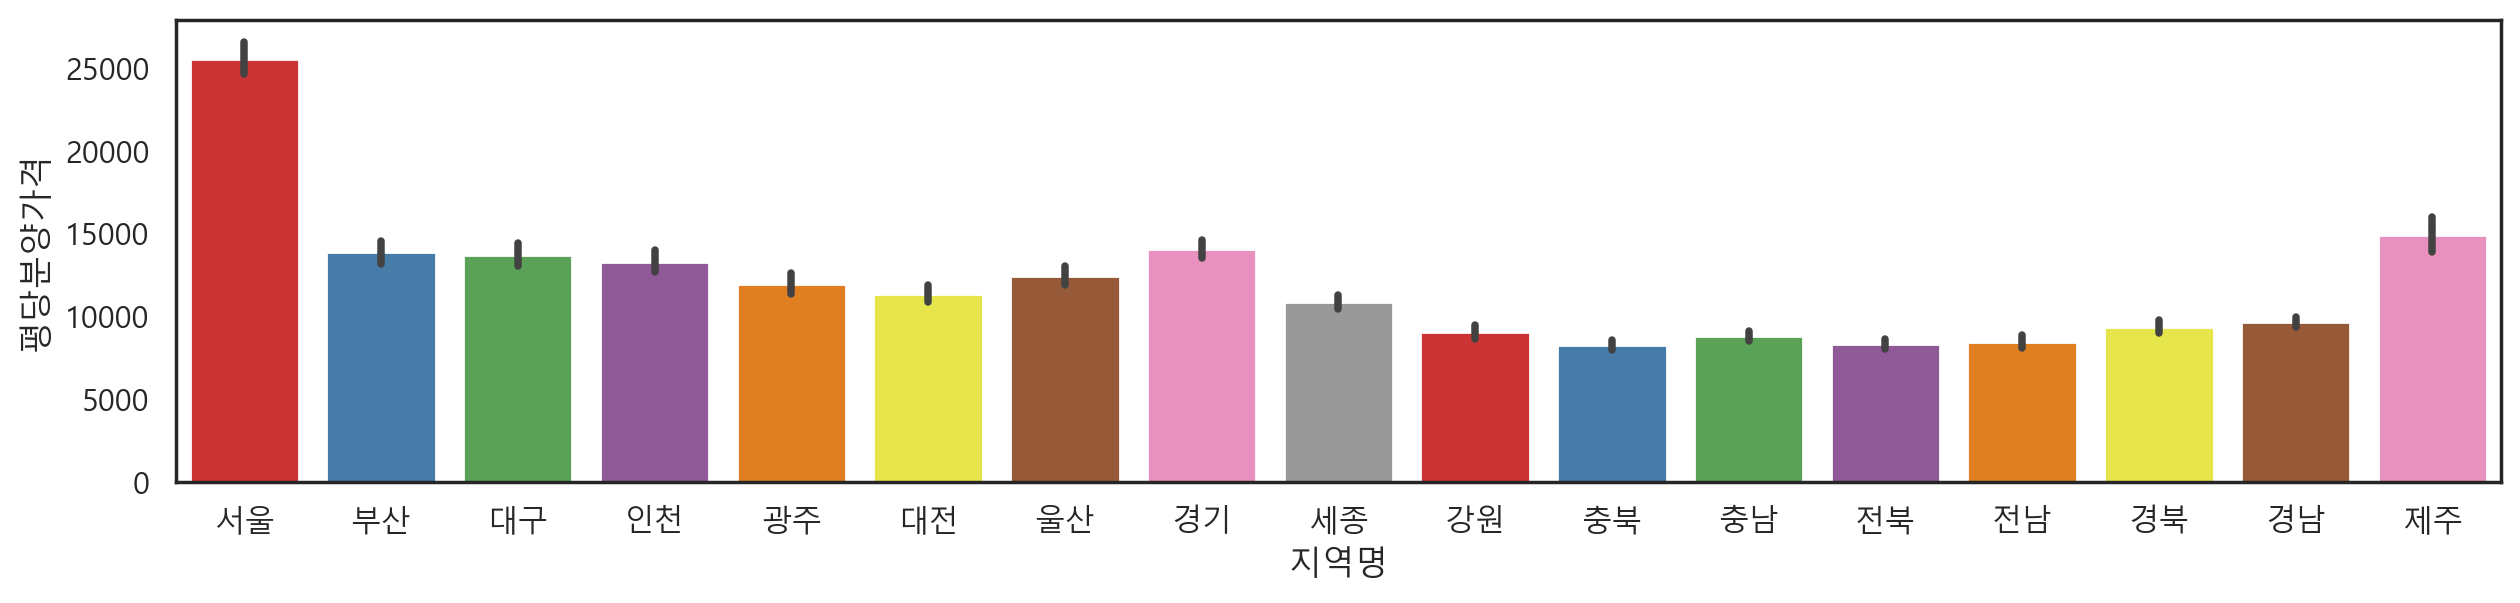

In [230]:
# 지역명당 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)
sns.barplot(data=df, x='지역명',y='평당분양가격', palette='Set1')

### ③ 연도별 평당분양가격(평균)

In [80]:
# 연도별 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ④ 연도, 지역별 평당분양가격(평균)

In [81]:
# 연도별, 지역별 평당분양가격 시각화(heatmap)

In [82]:
# 년도별 평균 평당분양가격의 추이

In [83]:
# 위의 그래프가 겹쳐서 작 보이지 않아 분리

In [84]:
# 관계형 그래프의 서브플롯을 그리는 함수는 relplot
# 범주형 그래프의 서브플롯을 그리는 함수는 catplot

In [85]:
# 연도별 평당분양가격의 사분위수


In [86]:
# 연도별 평당분양가격의 사분위수(분포포함 boxenplot)


In [87]:
# 연도별 평당분양가격의 사분위수(분포포함 violinplot)


In [88]:
# 연도에 따른 평당분양가격을 회귀식으로 시각화


In [89]:
# swarmplot은 많은 데이터를 그리기에는 시간이 많이 걸려 5%만 sampling후 그릴 것을 추천
# 연도별 평당분양가격 산점도
 

In [90]:
# 분양가격을 hist
